In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from IPython.display import JSON
import json

import os
import pathlib
import re
import yaml
import seaborn as sns
import mplcursors

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing Data

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("The configuration file was not found!")

In [3]:
filename = config['data']['clean']['clean_3']
youtube_data = pd.read_csv(filename)

In [4]:
filename = config['data']['clean']['clean_1']
trendig_videos = pd.read_csv(filename)

In [5]:
df = youtube_data.copy()
df = df.drop(columns=['Unnamed: 0'])

# Data Preprocessing

In [6]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,views,likes,...,categoryTitle,Views_now,Likes_now,Comments_now,TotalDuration(sec),comments_y,ChannelName,Subscribers,TotalViews,Videos
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,24,2020-08-12 00:00:00+00:00,bradley martyn|steve will do it|fullsend|nelk ...,1123529,39289,...,Entertainment,1592370.0,48100.0,3685.0,299.0,['It surprises me that someone wakes up and sa...,Life of Bradley Martyn,1200000.0,1.399142e+08,107.0
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,24,2020-08-12 00:00:00+00:00,[None],1120675,41671,...,Entertainment,1671520.0,49935.0,5034.0,640.0,"[""Do you think Brooklyn will find her boyfrien...",Brooklyn and Bailey,7130000.0,1.662745e+09,869.0
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,24,2020-08-13 00:00:00+00:00,88rising|diplo|joji|daylight|nectar|ballads 1|...,3363606,279004,...,Entertainment,18391481.0,491146.0,17859.0,236.0,"['88rising please take me in, one day.', 'Rapp...",88rising,6280000.0,3.622394e+09,1196.0
3,izVdUXx5zaU,Walmart Back to College | However you study,2020-08-06 17:10:23+00:00,UC701pqb1-HJPS4RMjSmK4Yg,Walmart,22,2020-09-06 00:00:00+00:00,Delivery|laptop|snacks|study|college|universit...,2729793,42,...,People & Blogs,NaN,NaN,NaN,NaN,NaN,Walmart,715000.0,4.466925e+07,689.0
4,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,[None],1722152,169501,...,Entertainment,3280517.0,225552.0,7349.0,43.0,"['Father: ""Why does that sound familiar?""\n\n*...",Bread Boys,2810000.0,4.493126e+08,361.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13231,AYDICzSsjmY,I Built a LEGO WATER PARK,2024-04-13 13:00:12+00:00,UC6889KWo5GDEqcYaym1lq9g,MasterBuilders,24,2024-04-15 00:00:00+00:00,[None],296206,7914,...,Entertainment,2099528.0,38797.0,1580.0,754.0,['Should Levi and Jeffery return in more video...,MasterBuilders,1060000.0,1.314750e+08,130.0
13232,8Tt5hh7gVVw,I Tested 1-Star Hotels (again),2024-04-13 15:00:04+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,2024-04-15 00:00:00+00:00,Ryan|Trahan,4532769,175418,...,Entertainment,18225894.0,374310.0,19347.0,1789.0,['Ryan as someone who lives here in abq I can ...,Ryan Trahan,16200000.0,3.376259e+09,385.0
13233,8p9NPLvlrv0,I Tried Every Airline In America,2024-04-13 16:23:06+00:00,UCyps-v4WNjWDnYRKmZ4BUGw,Airrack,24,2024-04-15 00:00:00+00:00,[None],743605,38774,...,Entertainment,3095175.0,98250.0,5496.0,1517.0,"['Schloob is my new favourite word', 'Didn’t e...",Airrack,15200000.0,2.985311e+09,224.0
13234,4MxNTXCRDOs,Family Photo Booth & Shopping In Town,2024-04-14 07:01:03+00:00,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,22,2024-04-15 00:00:00+00:00,daily|vlog|zoe|sugg|nala|cute|couple|zalfie|ba...,167147,11334,...,People & Blogs,393105.0,19822.0,499.0,1895.0,['My comfort family of over a decade is back f...,Alfie Deyes Vlogs,3610000.0,1.082942e+09,1595.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13236 entries, 0 to 13235
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            13236 non-null  object 
 1   title               13236 non-null  object 
 2   publishedAt         13236 non-null  object 
 3   channelId           13236 non-null  object 
 4   channelTitle        13236 non-null  object 
 5   categoryId          13236 non-null  int64  
 6   trending_date       13236 non-null  object 
 7   tags                13236 non-null  object 
 8   views               13236 non-null  int64  
 9   likes               13236 non-null  int64  
 10  comments_x          13236 non-null  int64  
 11  thumbnail_link      13236 non-null  object 
 12  description         12756 non-null  object 
 13  categoryTitle       13236 non-null  object 
 14  Views_now           12543 non-null  float64
 15  Likes_now           12496 non-null  float64
 16  Comm

### Comment on the dataset from the trending videos

- It seems that there are videos on youtube in the current day that have less views/likes/comments than those during the time they were trending. This likely occurs when YouTube thinks that those are bot views or illegal views etc. Therefore, YouTube decreases the views at a later time. Also videos might be deleted or channels to be suspended.
https://support.google.com/youtube/answer/3399767?hl=en#zippy=%2Chow-engagement-is-measured

- For this we will filter out videos with less views now and videos that no longer exist. The latter filter will also include, though, videos that were just deleted by the channel owner in later time.

#### Videos that will be filtered out

In [8]:
columns_to_check = ['Views_now', 'Likes_now', 'Comments_now']

# Filter rows where any of the specified columns have NaN values
df[df[columns_to_check].isna().any(axis=1)]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,views,likes,...,categoryTitle,Views_now,Likes_now,Comments_now,TotalDuration(sec),comments_y,ChannelName,Subscribers,TotalViews,Videos
3,izVdUXx5zaU,Walmart Back to College | However you study,2020-08-06 17:10:23+00:00,UC701pqb1-HJPS4RMjSmK4Yg,Walmart,22,2020-09-06 00:00:00+00:00,Delivery|laptop|snacks|study|college|universit...,2729793,42,...,People & Blogs,NaN,NaN,NaN,NaN,NaN,Walmart,715000.0,4.466925e+07,689.0
20,Idp1xvmLPHo,LaBrant Family Baby Boy Name Reveal.,2020-08-08 17:26:41+00:00,UC4-CH0epzZpD_ARhxCx6LaQ,The LaBrant Fam,22,2020-08-14 00:00:00+00:00,cole and sav|the labrant fam|labrant fam|the l...,6225338,297114,...,People & Blogs,8855875.0,309352.0,NaN,1344.0,NaN,The LaBrant Fam,12900000.0,4.622494e+09,628.0
23,LI1hCQ-6P0Y,AN UMBRELLA ACADEMY UNBOXING,2020-08-08 19:00:11+00:00,UCdrhoWKtC0CVoEvg12HNB-g,AidanRGallagher,24,2020-08-14 00:00:00+00:00,[None],1472373,151676,...,Entertainment,5023380.0,476379.0,NaN,247.0,NaN,AidanRGallagher,3040000.0,1.365012e+08,298.0
80,7pgY_TpojtU,Snoop Dogg - Nipsey Blue (Official Video),2020-08-14 17:00:45+00:00,UC-OO324clObi3H-U0bP77dw,SnoopDoggTV,22,2020-08-21 00:00:00+00:00,snoop dogg|snoop lion|snoop|dogg|westfesttv|sn...,1583477,86371,...,People & Blogs,NaN,NaN,NaN,NaN,NaN,SnoopDoggTV,9830000.0,3.637044e+09,1642.0
82,6BEfZCH1nN8,IMPORTANT NEWS ABOUT ANNABELLE “ ESCAPING “,2020-08-14 18:41:46+00:00,UC1ATY65YMBIF_wsaTgGa8Vw,Official Ed and Lorraine Warren Channel,24,2020-08-21 00:00:00+00:00,[None],1858899,54101,...,Entertainment,2654472.0,80435.0,NaN,109.0,NaN,Official Ed and Lorraine Warren Channel,342000.0,2.163336e+07,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13158,0_9hWLvKdD4,Jelly Roll & Lainey Wilson Perform “Save Me”| ...,2024-04-02 02:13:27+00:00,UCDiPds0v60wueil5B8w3fPQ,FOX,24,2024-04-11 00:00:00+00:00,iHeartRadio Music Awards 2024|iHeartRadio Awar...,522859,4531,...,Entertainment,NaN,NaN,NaN,NaN,NaN,FOX,1250000.0,6.608297e+08,7386.0
13197,7lY6UMqjdX0,Sammy Hagar Covers Toby Keith's I Love This Ba...,2024-04-08 02:31:29+00:00,UCStBfpQeA4imrUzPJoTXoFA,CMT,24,2024-04-15 00:00:00+00:00,cmt awards|CMT Awards 2024|live performances|a...,450627,3123,...,Entertainment,NaN,NaN,NaN,NaN,NaN,CMT,503000.0,1.929438e+08,2714.0
13198,7bLh8jx6-Gw,Brooks & Dunn Cover Toby Keith's Should've Bee...,2024-04-08 02:42:15+00:00,UCStBfpQeA4imrUzPJoTXoFA,CMT,24,2024-04-15 00:00:00+00:00,cmt awards|CMT Awards 2024|live performances|a...,370551,2319,...,Entertainment,NaN,NaN,NaN,NaN,NaN,CMT,503000.0,1.929438e+08,2714.0
13199,_tY28QzOI-Q,Lainey Wilson Covers Toby Keith's How Do You L...,2024-04-08 02:48:05+00:00,UCStBfpQeA4imrUzPJoTXoFA,CMT,24,2024-04-15 00:00:00+00:00,Cmt awards|cmt country music awards|country mu...,363766,2855,...,Entertainment,NaN,NaN,NaN,NaN,NaN,CMT,503000.0,1.929438e+08,2714.0


In [9]:
df[df['Views_now'] < df['views']]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,views,likes,...,categoryTitle,Views_now,Likes_now,Comments_now,TotalDuration(sec),comments_y,ChannelName,Subscribers,TotalViews,Videos
327,ASrVL97wX2E,Xbox Series S Revealed,2020-09-08 01:57:03+00:00,UCzOKcMln-okHDLE6BgXw3Hg,Brad Sams,22,2020-09-13 00:00:00+00:00,Xbox|Xbox Series S,245582,5485,...,People & Blogs,238847.0,5444.0,1582.0,313.0,['$299 is what most of us have been hoping for...,Brad Sams,52900.0,17143233.0,980.0
9586,opkygjTUzEQ,Al Ahly 1-4 Real Madrid | HIGHLIGHTS | Semifin...,2023-02-08 21:07:52+00:00,UC-2hhqBG5Su7s91_HmhaODQ,Fox Deportes,24,2023-02-15 00:00:00+00:00,[None],279934,2394,...,Entertainment,278514.0,2389.0,189.0,260.0,['Como extraño los comentarios de John Laguna ...,Fox Deportes,594000.0,259673682.0,44691.0
9889,KniAtNC53VQ,Ke Huy Quan Wins Best Supporting Actor 'Everyt...,2023-03-13 01:03:20+00:00,UCgRQHK8Ttr1j9xCEpCAlgbQ,Variety,24,2023-03-19 00:00:00+00:00,Variety|Variety Studio|oscars 2023|ke huy quan...,1624971,40355,...,Entertainment,1475379.0,41483.0,1966.0,221.0,"[""Just put this shit in perspective: He didn't...",Variety,1460000.0,666322161.0,5549.0
12753,XhybTrAJqK8,#GameTimeGlow 💚 A New Sports Tradition for Dad...,2024-02-09 13:59:18+00:00,UCbYpEeYd9_2pYH6buMgzX_w,Cetaphil US,22,2024-02-16 00:00:00+00:00,[None],484745,2382,...,People & Blogs,454304.0,2524.0,254.0,82.0,"['It\'s the ""Dad I love you"" bracelet for me.'...",Cetaphil US,23500.0,73613344.0,291.0


In [10]:
df.dropna(subset = ['Views_now', 'Likes_now', 'Comments_now'], inplace = True)

In [11]:
df_filtered = df[df['Views_now'] > df['views']]

In [12]:
df_filtered.reset_index(drop=True, inplace = True)

## Data initial check

In [13]:
df = df_filtered.copy()
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,views,likes,...,categoryTitle,Views_now,Likes_now,Comments_now,TotalDuration(sec),comments_y,ChannelName,Subscribers,TotalViews,Videos
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,24,2020-08-12 00:00:00+00:00,bradley martyn|steve will do it|fullsend|nelk ...,1123529,39289,...,Entertainment,1592370.0,48100.0,3685.0,299.0,['It surprises me that someone wakes up and sa...,Life of Bradley Martyn,1200000.0,1.399142e+08,107.0
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,24,2020-08-12 00:00:00+00:00,[None],1120675,41671,...,Entertainment,1671520.0,49935.0,5034.0,640.0,"[""Do you think Brooklyn will find her boyfrien...",Brooklyn and Bailey,7130000.0,1.662745e+09,869.0
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,24,2020-08-13 00:00:00+00:00,88rising|diplo|joji|daylight|nectar|ballads 1|...,3363606,279004,...,Entertainment,18391481.0,491146.0,17859.0,236.0,"['88rising please take me in, one day.', 'Rapp...",88rising,6280000.0,3.622394e+09,1196.0
3,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,[None],1722152,169501,...,Entertainment,3280517.0,225552.0,7349.0,43.0,"['Father: ""Why does that sound familiar?""\n\n*...",Bread Boys,2810000.0,4.493126e+08,361.0
4,kz7gHA2N6nQ,"World's Strongest Man vs $10,000 Safe! *unbrea...",2020-08-06 20:56:22+00:00,UCXg4rJUbDP1IP3TmZ9KDpJg,Brianna,24,2020-08-13 00:00:00+00:00,funny|comedy|challenge|family|brianna|preston,2542951,55024,...,Entertainment,7464559.0,151301.0,6969.0,1026.0,['The subscribe button is unbreakable. Just tr...,Brianna,13400000.0,5.483365e+09,772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,AYDICzSsjmY,I Built a LEGO WATER PARK,2024-04-13 13:00:12+00:00,UC6889KWo5GDEqcYaym1lq9g,MasterBuilders,24,2024-04-15 00:00:00+00:00,[None],296206,7914,...,Entertainment,2099528.0,38797.0,1580.0,754.0,['Should Levi and Jeffery return in more video...,MasterBuilders,1060000.0,1.314750e+08,130.0
12363,8Tt5hh7gVVw,I Tested 1-Star Hotels (again),2024-04-13 15:00:04+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,2024-04-15 00:00:00+00:00,Ryan|Trahan,4532769,175418,...,Entertainment,18225894.0,374310.0,19347.0,1789.0,['Ryan as someone who lives here in abq I can ...,Ryan Trahan,16200000.0,3.376259e+09,385.0
12364,8p9NPLvlrv0,I Tried Every Airline In America,2024-04-13 16:23:06+00:00,UCyps-v4WNjWDnYRKmZ4BUGw,Airrack,24,2024-04-15 00:00:00+00:00,[None],743605,38774,...,Entertainment,3095175.0,98250.0,5496.0,1517.0,"['Schloob is my new favourite word', 'Didn’t e...",Airrack,15200000.0,2.985311e+09,224.0
12365,4MxNTXCRDOs,Family Photo Booth & Shopping In Town,2024-04-14 07:01:03+00:00,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,22,2024-04-15 00:00:00+00:00,daily|vlog|zoe|sugg|nala|cute|couple|zalfie|ba...,167147,11334,...,People & Blogs,393105.0,19822.0,499.0,1895.0,['My comfort family of over a decade is back f...,Alfie Deyes Vlogs,3610000.0,1.082942e+09,1595.0


In [14]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [15]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'views', 'likes', 'comments_x',
       'thumbnail_link', 'description', 'categoryTitle', 'Views_now',
       'Likes_now', 'Comments_now', 'TotalDuration(sec)', 'comments_y',
       'ChannelName', 'Subscribers', 'TotalViews', 'Videos'],
      dtype='object')

In [16]:
df.rename(columns={ 'comments_x': 'comments',  'comments_y': 'comments_thread'}, inplace=True)

In [17]:
df = df[['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'views', 'likes', 'comments', 'description',
        'categoryTitle', 'TotalDuration(sec)', 'TotalViews', 'Videos', 'comments_thread' ]]

# Feature Engineering

## Channel Features

### Average views per video

In [18]:
df['channel_views_per_video'] = df['TotalViews']/df['Videos']

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\4026453645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['channel_views_per_video'] = df['TotalViews']/df['Videos']


In [19]:
df

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,categoryTitle,TotalDuration(sec),TotalViews,Videos,comments_thread,channel_views_per_video
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,2020-08-12 00:00:00+00:00,1123529,39289,3626,It is what it is.... New drop coming this mont...,Entertainment,299.0,1.399142e+08,107.0,['It surprises me that someone wakes up and sa...,1.307609e+06
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,2020-08-12 00:00:00+00:00,1120675,41671,5282,Brooklyn is going on TEN DATES in TEN DAYS! (T...,Entertainment,640.0,1.662745e+09,869.0,"[""Do you think Brooklyn will find her boyfrien...",1.913400e+06
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,2020-08-13 00:00:00+00:00,3363606,279004,13270,LISTEN TO DAYLIGHT: https://88rising.lnk.to/Da...,Entertainment,236.0,3.622394e+09,1196.0,"['88rising please take me in, one day.', 'Rapp...",3.028757e+06
3,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,2020-08-12 00:00:00+00:00,1722152,169501,7263,badum tss *funny haha noises*YOU CAN FIND US H...,Entertainment,43.0,4.493126e+08,361.0,"['Father: ""Why does that sound familiar?""\n\n*...",1.244633e+06
4,kz7gHA2N6nQ,"World's Strongest Man vs $10,000 Safe! *unbrea...",2020-08-06 20:56:22+00:00,UCXg4rJUbDP1IP3TmZ9KDpJg,Brianna,2020-08-13 00:00:00+00:00,2542951,55024,5796,"World's Strongest Man vs $10,000 Safe! *unbrea...",Entertainment,1026.0,5.483365e+09,772.0,['The subscribe button is unbreakable. Just tr...,7.102805e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,AYDICzSsjmY,I Built a LEGO WATER PARK,2024-04-13 13:00:12+00:00,UC6889KWo5GDEqcYaym1lq9g,MasterBuilders,2024-04-15 00:00:00+00:00,296206,7914,581,"I built a GIANT Lego water park with pools, wa...",Entertainment,754.0,1.314750e+08,130.0,['Should Levi and Jeffery return in more video...,1.011346e+06
12363,8Tt5hh7gVVw,I Tested 1-Star Hotels (again),2024-04-13 15:00:04+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,2024-04-15 00:00:00+00:00,4532769,175418,11464,jammy time,Entertainment,1789.0,3.376259e+09,385.0,['Ryan as someone who lives here in abq I can ...,8.769504e+06
12364,8p9NPLvlrv0,I Tried Every Airline In America,2024-04-13 16:23:06+00:00,UCyps-v4WNjWDnYRKmZ4BUGw,Airrack,2024-04-15 00:00:00+00:00,743605,38774,2897,Follow me on Instagram!INSTAGRAM ▶️ https://ur...,Entertainment,1517.0,2.985311e+09,224.0,"['Schloob is my new favourite word', 'Didn’t e...",1.332728e+07
12365,4MxNTXCRDOs,Family Photo Booth & Shopping In Town,2024-04-14 07:01:03+00:00,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,2024-04-15 00:00:00+00:00,167147,11334,425,► Family Photo Booth & Shopping In Town• Ad • ...,People & Blogs,1895.0,1.082942e+09,1595.0,['My comfort family of over a decade is back f...,6.789606e+05


## Video Engagement Metrics

### Engagement Ratio

In [20]:
df['Engagement Rate1'] = (100*(df['likes']+df['comments'])/df['views']).round(2)   # %

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\240452985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engagement Rate1'] = (100*(df['likes']+df['comments'])/df['views']).round(2)   # %


### Like-to-View Ratio

In [21]:
df['LikeRatio1'] = (1000*df['likes']/ df['views']).round(2)  # likes per 1000 Views

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\1067218837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LikeRatio1'] = (1000*df['likes']/ df['views']).round(2)  # likes per 1000 Views


### Comment-to-View Ratio

In [22]:
df['CommentRatio1'] = (1000*df['comments']/ df['views']).round(2)  # Comments per 1000 Views

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\4038100786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CommentRatio1'] = (1000*df['comments']/ df['views']).round(2)  # Comments per 1000 Views


## Temporal Features

### Time to Trend & Trending Duration

In [23]:
df1 = trendig_videos.copy()
df1 = df1.drop(columns=['Unnamed: 0'])
df1['publishedAt'] = pd.to_datetime(df1['publishedAt'])
df1['trending_date'] = pd.to_datetime(df1['trending_date'])

In [24]:
# Calculate time to trend and trending duration
df1['time_to_trend_hr'] = (((df1.groupby('video_id')['trending_date'].transform('min') - df1['publishedAt']).dt.total_seconds()) / (60 * 60)).round(2) # in hours

df1['trending_duration_days'] = (df1.groupby('video_id')['trending_date'].transform('max') - df1.groupby('video_id')['trending_date'].transform('min')).dt.days + \
                          (df1.groupby('video_id')['trending_date'].transform('max') - df1.groupby('video_id')['trending_date'].transform('min')).dt.seconds / (24 * 60 * 60) # in days

# Calculate time passed since published until today
today = pd.Timestamp.now(tz='UTC').normalize()  # Get today's date as a Timestamp and normalize to midnight
df1['time_passed_since_published'] = (today - df1['publishedAt']).dt.days


In [25]:
df_time = df1 [['video_id', 'time_to_trend_hr', 'trending_duration_days', 'time_passed_since_published']]

In [26]:
df_time.drop_duplicates(subset='video_id', keep='last', inplace=True)

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\1916445105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.drop_duplicates(subset='video_id', keep='last', inplace=True)


In [27]:
df_time

,video_id,time_to_trend_hr,trending_duration_days,time_passed_since_published
54,NYFHnIiA8gE,110.50,0.0,1426
55,czwejgoH3zs,124.21,0.0,1427
56,sSjtGqRXQ9Y,120.97,0.0,1427
57,Uxf0f27n-m4,118.24,0.0,1426
58,7QJPCIBgV5g,104.00,0.0,1426
...,...,...,...,...
76582,aVho4PLF6iE,51.00,7.0,89
76583,d7DdLRe5QgM,17.50,9.0,89
76584,aFsfJYWpqII,13.00,10.0,90
76585,pRAsQss17xs,33.11,6.0,87


### Velocity of Views, Likes, Comments
since it was published until the last date it was on trends

In [28]:
df1[df1['video_id'] == 'hpMeCem6Hss']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,views,likes,comments,thumbnail_link,description,categoryTitle,time_to_trend_hr,trending_duration_days,time_passed_since_published
60,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,24,2020-08-12 00:00:00+00:00,bradley martyn|steve will do it|fullsend|nelk ...,1123529,39289,3626,https://i.ytimg.com/vi/hpMeCem6Hss/default.jpg,It is what it is.... New drop coming this mont...,Entertainment,148.29,0.0,1428


In [29]:
# Calculate velocity for each video_id
def calculate_velocity(group):
    # Calculate the number of days each video was trending
    trending_period = (group['trending_date'].max() - group['trending_date'].min()).days + 1
    
    # Calculate the total change in views, likes, and comments
    total_views_change = group['views'].max() - 0 # from published date, assuming 0 to caclculate velocities if video stays only one day in trends 
    total_likes_change = group['likes'].max() - 0
    total_comments_change = group['comments'].max() - 0
    
    # Calculate the time since publication
    days_since_publish = (group['trending_date'].max() - group['publishedAt'].min()).days + 1
    
    # Check if days_since_publish is greater than 0 to avoid division by zero
    if days_since_publish > 0:
        # Calculate the velocity (change per day)
        views_velocity = total_views_change / days_since_publish
        likes_velocity = total_likes_change / days_since_publish
        comments_velocity = total_comments_change / days_since_publish
    else:
        # If days_since_publish is 0 or less (though it should not be negative), handle the division issue
        views_velocity = np.nan  # Assign NaN or handle as appropriate
        likes_velocity = np.nan
        comments_velocity = np.nan
    
    return pd.Series({
        'views_velocity': views_velocity,
        'likes_velocity': likes_velocity,
        'comments_velocity': comments_velocity
    })

In [30]:
# Apply the calculation to each group
velocity_df = df1.groupby('video_id').apply(calculate_velocity).reset_index()
velocity_df

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\2176525208.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  velocity_df = df1.groupby('video_id').apply(calculate_velocity).reset_index()


,video_id,views_velocity,likes_velocity,comments_velocity
0,--2O86Z0hsM,8.974750e+04,2881.666667,239.833333
1,--40TEbZ9Is,1.365218e+05,1605.800000,144.600000
2,-0GbqToowCw,4.258200e+05,25885.666667,902.333333
3,-0LHggNGP4A,3.618957e+06,27971.600000,492.600000
4,-0PZSxZuAXQ,9.074580e+04,1637.400000,364.800000
...,...,...,...,...
13231,zy8vIiE8xXY,1.213007e+05,6327.571429,475.000000
13232,zyIWjMNDXD8,1.026904e+05,8621.600000,529.600000
13233,zyY6G1UX7HU,5.536462e+04,409.500000,21.000000
13234,zytxCCrzlfg,1.335342e+05,4534.200000,214.400000


In [31]:
df_time_merged = pd.merge(velocity_df, df_time, on='video_id', how='inner')
df_time_merged

,video_id,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,time_passed_since_published
0,--2O86Z0hsM,8.974750e+04,2881.666667,239.833333,24.68,4.0,847
1,--40TEbZ9Is,1.365218e+05,1605.800000,144.600000,22.94,4.0,1017
2,-0GbqToowCw,4.258200e+05,25885.666667,902.333333,28.87,4.0,805
3,-0LHggNGP4A,3.618957e+06,27971.600000,492.600000,23.50,4.0,622
4,-0PZSxZuAXQ,9.074580e+04,1637.400000,364.800000,11.83,4.0,1062
...,...,...,...,...,...,...,...
13231,zy8vIiE8xXY,1.213007e+05,6327.571429,475.000000,104.00,2.0,1135
13232,zyIWjMNDXD8,1.026904e+05,8621.600000,529.600000,29.21,3.0,819
13233,zyY6G1UX7HU,5.536462e+04,409.500000,21.000000,2.40,7.0,1238
13234,zytxCCrzlfg,1.335342e+05,4534.200000,214.400000,24.15,3.0,821


### Publish Day of Week

In [32]:
# Calculate day of the week as number (Monday=0, Sunday=6)
df['DayOfWeek'] = df['publishedAt'].dt.dayofweek

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\1496121069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['publishedAt'].dt.dayofweek


### Publish Hour of Day

In [33]:
# Calculate time of day in hours and minutes
df['TimeOfDay'] = (df['publishedAt'].dt.hour + df['publishedAt'].dt.minute / 60).round(2)

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\1325483506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeOfDay'] = (df['publishedAt'].dt.hour + df['publishedAt'].dt.minute / 60).round(2)


## Content Features

### Title Length

In [34]:
df['TitleLength'] = df['title'].apply(lambda x: len(x))

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\3648889390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TitleLength'] = df['title'].apply(lambda x: len(x))


In [35]:
df.sort_values(by = 'TitleLength').head(50)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,TotalViews,Videos,comments_thread,channel_views_per_video,Engagement Rate1,LikeRatio1,CommentRatio1,DayOfWeek,TimeOfDay,TitleLength
5796,0NLnGJnGBcc,0,2022-04-01 18:30:10+00:00,UC7nm9Nzo12SDQzrxJS8xdVg,countdown,2022-04-07 00:00:00+00:00,1280855,100450,23944,NaN,...,1.148441e+07,173.0,"['sorry chris rock, THIS is the greatest momen...",6.638386e+04,9.71,78.42,18.69,4,18.50,1
6133,cZMiC8FnZtw,1,2022-05-01 19:05:25+00:00,UCIXoKTsxY1tJwRk8LTpWk0g,Generation Loss,2022-05-07 00:00:00+00:00,184427,48674,3657,1https://twitter.com/Generationloss1,...,3.852725e+06,13.0,['This is the first of a few. More will come s...,2.963635e+05,28.37,263.92,19.83,6,19.08,1
3281,s3EISTf1prk,bed,2021-08-18 16:06:48+00:00,UC78cxCAcp7JfQPgKxYdyGrg,emma chamberlain,2021-08-23 00:00:00+00:00,2415448,206305,9517,i spend more time in bed than anyone i knowcha...,...,1.646552e+09,293.0,['I cant be the only one obsessed with the cat...,5.619630e+06,8.94,85.41,3.94,2,16.10,3
4645,Dpdiv6_YS8U,hey.,2021-12-18 23:40:31+00:00,UCBODyKF0JMbUd6D9Bklyzbw,Alpharad,2021-12-24 00:00:00+00:00,385219,33550,2725,➤ MERCH: http://pleasebuymymerch.com➤ PODCAST:...,...,1.837003e+09,1570.0,"[""Glad you're feeling good about making conten...",1.170066e+06,9.42,87.09,7.07,5,23.67,4
5348,A_sXXIxrovA,LOVE,2022-02-16 21:56:26+00:00,UC3EFKdXAU99j3ppGgvTz7XQ,Bretman Rock,2022-02-22 00:00:00+00:00,948149,61715,1759,Baddietine collection is live! https://dabadde...,...,5.704693e+08,144.0,['“Overthinking leads to insecurity” TRUTH BOM...,3.961592e+06,6.69,65.09,1.86,2,21.93,4
46,goOmZUwQYlA,100k,2020-08-11 03:06:21+00:00,UCf1JAjcoBlCRi4pHG2k_W7w,Lilypi2,2020-08-16 00:00:00+00:00,348679,33010,915,thanks,...,1.013230e+08,135.0,"[""I'm glad Michael has his priorities straight...",7.505404e+05,9.73,94.67,2.62,1,3.10,4
3890,4qQtrh4rzYg,Lmao,2021-10-17 18:28:16+00:00,UCj-Hs9XuzY15HE1q5R_GnJQ,manlikeisaac,2021-10-23 00:00:00+00:00,1603080,84143,765,NaN,...,3.765700e+09,1933.0,"['Subscribe for more 😂❤️', 'I used to do this ...",1.948112e+06,5.30,52.49,0.48,6,18.47,4
3322,d5ZTDX1Ju98,23.08,2021-08-23 14:15:02+00:00,UCIhBYw9Hgl-SFWnvZGSWiTw,YOLO HOUSE,2021-08-28 00:00:00+00:00,533210,42541,2718,YOLOCLUB: https://yoloclub.me/===============Y...,...,6.076544e+09,3638.0,"['Всем спасибо за вашу поддержку, мы вас любим...",1.670298e+06,8.49,79.78,5.10,0,14.25,5
9494,8Pc4CWwWvCc,I WON,2023-04-23 19:47:21+00:00,UCvxfEIG3PHpgM0TMJJ_SH-w,Jarvis,2023-04-30 00:00:00+00:00,888708,35738,2417,🕺 TikTok: @jarvis📸 Instagram: @fazejarvis🐦 Twi...,...,1.713008e+09,728.0,['I have a lot of respect for zanetti in and o...,2.353033e+06,4.29,40.21,2.72,6,19.78,5
7583,QZ_j3q-VWAs,alone,2022-09-25 21:30:01+00:00,UCjVLCcrQsYX7Lu98pOcP3GA,Nicolas Sturniolo,2022-10-01 00:00:00+00:00,295473,44477,2348,NaN,...,2.838688e+06,6.0,['i personally love the sit down talks. it see...,4.731147e+05,15.85,150.53,7.95,6,21.50,5


## Text Features

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic used in natural language processing and information retrieval to evaluate how important a word is to a document in a collection or corpus. 

* Importance: Words with high TF-IDF scores are considered more important to the document.
* Document Similarity: TF-IDF is often used in document similarity and information retrieval tasks. Documents with similar TF-IDF profiles are likely to be similar in content.
* Feature Extraction: In machine learning, TF-IDF is used to transform text into numerical features suitable for algorithms like classifiers or clustering algorithms.

### Title

In [36]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'views', 'likes', 'comments', 'description',
       'categoryTitle', 'TotalDuration(sec)', 'TotalViews', 'Videos',
       'comments_thread', 'channel_views_per_video', 'Engagement Rate1',
       'LikeRatio1', 'CommentRatio1', 'DayOfWeek', 'TimeOfDay', 'TitleLength'],
      dtype='object')

In [37]:
df.nunique()

video_id                   12367
title                      12268
publishedAt                12339
channelId                   2531
channelTitle                2611
trending_date               1316
views                      12344
likes                      11866
comments                    7208
description                11513
categoryTitle                  2
TotalDuration(sec)          2538
TotalViews                  2529
Videos                      1482
comments_thread            12291
channel_views_per_video     2528
Engagement Rate1            1570
LikeRatio1                  7247
CommentRatio1               1437
DayOfWeek                      7
TimeOfDay                   1284
TitleLength                   99
dtype: int64

In [38]:
from spacy.lang.en.stop_words import STOP_WORDS

# Load SpaCy stopwords for English
spacy_stopwords = STOP_WORDS

# NLTK stopwords
nltk_stop_words = set(stopwords.words('english'))

# Combine NLTK and SpaCy stopwords
stop_words = nltk_stop_words.union(spacy_stopwords)

def is_english_word(word):
    # Check if a word consists only of English letters
    return word.encode('ascii', 'ignore').decode('ascii') == word

def preprocess_text(text):
    if text is None:
        return ''
    
    # Remove non-English words
    tokens = text.split()
    tokens = [word for word in tokens if is_english_word(word)]

   
    # Convert tokens to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Filter out stopwords
    processed_tokens = [word for word in tokens if word not in stop_words]
    
    # Remove special characters and numbers
    processed_tokens = [re.sub(r'[^A-Za-z]', ' ', token) for token in tokens]

    # Remove words with less than 2 letters at the end
    processed_tokens = [re.sub(r'\b\w{1,2}\b', '', token) for token in processed_tokens]
    
    # Remove extra spaces caused by removal of short words
    processed_tokens = [re.sub(r'\s+', ' ', token).strip() for token in processed_tokens]
    
    # Filter out stopwords again after removing special characters and numbers
    processed_tokens = [word for word in processed_tokens if word not in stop_words]
    
    processed_text = ' '.join(processed_tokens)
    
    return processed_text



# Define the function to remove words in channelTitle from cleaned_title
def remove_channel_title_words(cleaned_title, channel_title):
    def split_words_by_capital(text):
        words = []
        current_word = []
        for char in text:
            if char.isupper() and current_word:
                words.append(''.join(current_word))
                current_word = [char.lower()]
            else:
                current_word.append(char.lower())
        if current_word:
            words.append(''.join(current_word))
        return words
    
    # Split channel_title into words based on capitalization
    channel_title_words = set(split_words_by_capital(channel_title))
    
    # Convert cleaned_title to lower case and split into words
    cleaned_title_words = cleaned_title.lower().split()
    
    # Filter out words present in channel_title or its parts
    filtered_words = []
    for word in cleaned_title_words:
        # Check if any part of channel_title is equal to the current word
        if word not in channel_title_words:
            filtered_words.append(word)
    
    # Join the filtered words back into a single string
    return ' '.join(filtered_words)

In [39]:
example_text = "Bonjour! This's a test. Texto en español, número 123."
print(preprocess_text(example_text))

bonjour  test texto  


In [40]:
# Fill NaN values with empty strings and convert all values to strings
#df['title'] = df['title'].fillna('').astype(str)

# Preprocess each text column
df['cleaned_title'] = df['title'].apply(preprocess_text)

In [41]:
# Apply the function to each row
df['cleaned_title1'] = df.apply(lambda row: remove_channel_title_words(row['cleaned_title'], row['channelTitle']), axis=1)

In [42]:
contains_stray_kids = df['cleaned_title'].str.contains('Sidemen', case=False, na=False)
filtered_df11 = df[contains_stray_kids]
filtered_df11

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,comments_thread,channel_views_per_video,Engagement Rate1,LikeRatio1,CommentRatio1,DayOfWeek,TimeOfDay,TitleLength,cleaned_title,cleaned_title1
20,YIlhmtpDjmo,WHAT KSI SHOULD HAVE BOUGHT TOBI FOR SIDEMEN S...,2020-08-08 18:30:02+00:00,UCWZmCMB7mmKWcXJSIPRhzZw,Miniminter,2020-08-14 00:00:00+00:00,2324620,194261,5692,The Sidemen Video: https://www.youtube.com/wat...,...,"['Next video: ""I felt bad for Manny not gettin...",1.858205e+06,8.60,83.57,2.45,5,18.50,51,ksi bought tobi sidemen sunday,ksi bought tobi sidemen sunday
28,lw68FF0GEX8,JEOPARDY: SIDEMEN EDITION,2020-08-09 18:42:44+00:00,UCDogdKl7t7NHzQ95aEwkdMw,Sidemen,2020-08-14 00:00:00+00:00,4650276,232063,9731,THE SIDEMEN PLAY JEOPARDY!! HOW EXCITING!! 👉🏻 ...,...,['The one time KSI didn’t say the N word. He l...,1.736306e+07,5.20,49.90,2.09,6,18.70,25,jeopardy sidemen edition,jeopardy edition
70,7XvVaeVdPnQ,The SIDEMEN play FALL GUYS (Sidemen Gaming),2020-08-13 17:00:03+00:00,UCh5mLn90vUaB1PbRRx_AiaA,MoreSidemen,2020-08-19 00:00:00+00:00,5019889,225694,8470,#SidemenGaming• Sidemen: http://www.youtube.co...,...,['JJ:”this games kinda fun u know”\n\nEveryone...,4.256774e+06,4.66,44.96,1.69,3,17.00,43,sidemen play fall guys sidemen gaming,play fall guys gaming
101,XD6zGTNTy0Q,SIDEMEN GUESS THE FAKE RAPPER,2020-08-16 18:39:11+00:00,UCjRkTl_HP4zOh3UFaThgRZw,SidemenReacts,2020-08-23 00:00:00+00:00,1818530,209473,8911,Sidemen Guess The Fake Rapper... 1st Sidemen R...,...,['Girl in grey: “I think we’re gonna have to s...,2.209396e+06,12.01,115.19,4.90,6,18.65,29,sidemen guess fake rapper,guess fake rapper
245,O5DaEUolvRs,"SIDEMEN $50,000 RACE ACROSS THE UK",2020-08-30 17:00:08+00:00,UCDogdKl7t7NHzQ95aEwkdMw,Sidemen,2020-09-05 00:00:00+00:00,6417155,861189,20488,The Sidemen form 2 teams & race across the cou...,...,['Josh really callin Pegasus Jets like GTA now...,1.736306e+07,13.74,134.20,3.19,6,17.00,34,sidemen race,race
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11868,_bhXh1KxVHc,SIDEMEN AMONG US MAFIA ROLE: THERE'S 3 IMPOSTE...,2024-02-05 17:00:33+00:00,UCh5mLn90vUaB1PbRRx_AiaA,MoreSidemen,2024-02-13 00:00:00+00:00,4284848,181414,3676,📞: Order Hit Send at: https://www.hit-send.com...,...,['This is 100x better than 90% of Sidemen Sund...,4.256774e+06,4.32,42.34,0.86,0,17.00,51,sidemen mafia role imposters,mafia role imposters
11940,nSI_2yvBAIU,SIDEMEN AMONG US BUT EVERYTHING IS DOUBLE SPEE...,2024-02-13 18:00:19+00:00,UCh5mLn90vUaB1PbRRx_AiaA,MoreSidemen,2024-02-21 00:00:00+00:00,4611740,175423,5476,📞: Order Hit Send at: https://www.hit-send.com...,...,"['MASTERCLASS.', 'Eating and sideman among us ...",4.256774e+06,3.92,38.04,1.19,1,18.00,50,sidemen double speed,double speed
11959,udJ9EG1lAME,SIDEMEN MAFIA BUT THERE'S A MEDIC ROLE,2024-02-15 19:00:33+00:00,UCh5mLn90vUaB1PbRRx_AiaA,MoreSidemen,2024-02-22 00:00:00+00:00,2390164,107948,1427,🍗: Order food NOW at: https://www.eatsides.com...,...,"[""They should do a round where Simon is the ho...",4.256774e+06,4.58,45.16,0.60,3,19.00,38,sidemen mafia medic role,mafia medic role
12010,exnk0ZXLqVo,The Sidemen Argue They're More Talented Than M...,2024-02-21 17:00:25+00:00,UC4oVjJptcsvtgIMrdIUQYlQ,LADbible TV,2024-02-27 00:00:00+00:00,1414245,50304,1260,The @Sidemen joined LADbible to settle some of...,...,"['The Sidemen Story is out now on Netflix.', '...",9.513432e+05,3.65,35.57,0.89,2,17.00,72,sidemen argue talented mrbeast agree disagree,sidemen argue talented mrbeast agree disagree


In [43]:
df

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,comments_thread,channel_views_per_video,Engagement Rate1,LikeRatio1,CommentRatio1,DayOfWeek,TimeOfDay,TitleLength,cleaned_title,cleaned_title1
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,2020-08-12 00:00:00+00:00,1123529,39289,3626,It is what it is.... New drop coming this mont...,...,['It surprises me that someone wakes up and sa...,1.307609e+06,3.82,34.97,3.23,2,19.70,92,fought bryce hall mike majlak lana rhoades st...,fought bryce hall mike majlak lana rhoades ste...
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,2020-08-12 00:00:00+00:00,1120675,41671,5282,Brooklyn is going on TEN DATES in TEN DAYS! (T...,...,"[""Do you think Brooklyn will find her boyfrien...",1.913400e+06,4.19,37.18,4.71,2,21.12,53,brooklyn dates days meet jorge date,brooklyn dates days meet jorge date
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,2020-08-13 00:00:00+00:00,3363606,279004,13270,LISTEN TO DAYLIGHT: https://88rising.lnk.to/Da...,...,"['88rising please take me in, one day.', 'Rapp...",3.028757e+06,8.69,82.95,3.95,3,16.00,46,joji diplo daylight official music video,joji diplo daylight official music video
3,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,2020-08-12 00:00:00+00:00,1722152,169501,7263,badum tss *funny haha noises*YOU CAN FIND US H...,...,"['Father: ""Why does that sound familiar?""\n\n*...",1.244633e+06,10.26,98.42,4.22,3,19.78,34,son lemme teach new,son lemme teach new
4,kz7gHA2N6nQ,"World's Strongest Man vs $10,000 Safe! *unbrea...",2020-08-06 20:56:22+00:00,UCXg4rJUbDP1IP3TmZ9KDpJg,Brianna,2020-08-13 00:00:00+00:00,2542951,55024,5796,"World's Strongest Man vs $10,000 Safe! *unbrea...",...,['The subscribe button is unbreakable. Just tr...,7.102805e+06,2.39,21.64,2.28,3,20.93,52,world strongest man safe unbreakable,world strongest man safe unbreakable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,AYDICzSsjmY,I Built a LEGO WATER PARK,2024-04-13 13:00:12+00:00,UC6889KWo5GDEqcYaym1lq9g,MasterBuilders,2024-04-15 00:00:00+00:00,296206,7914,581,"I built a GIANT Lego water park with pools, wa...",...,['Should Levi and Jeffery return in more video...,1.011346e+06,2.87,26.72,1.96,5,13.00,25,built lego water park,built lego water park
12363,8Tt5hh7gVVw,I Tested 1-Star Hotels (again),2024-04-13 15:00:04+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,2024-04-15 00:00:00+00:00,4532769,175418,11464,jammy time,...,['Ryan as someone who lives here in abq I can ...,8.769504e+06,4.12,38.70,2.53,5,15.00,30,tested star hotels,tested star hotels
12364,8p9NPLvlrv0,I Tried Every Airline In America,2024-04-13 16:23:06+00:00,UCyps-v4WNjWDnYRKmZ4BUGw,Airrack,2024-04-15 00:00:00+00:00,743605,38774,2897,Follow me on Instagram!INSTAGRAM ▶️ https://ur...,...,"['Schloob is my new favourite word', 'Didn’t e...",1.332728e+07,5.60,52.14,3.90,5,16.38,32,tried airline america,tried airline america
12365,4MxNTXCRDOs,Family Photo Booth & Shopping In Town,2024-04-14 07:01:03+00:00,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,2024-04-15 00:00:00+00:00,167147,11334,425,► Family Photo Booth & Shopping In Town• Ad • ...,...,['My comfort family of over a decade is back f...,6.789606e+05,7.04,67.81,2.54,6,7.02,37,family photo booth shopping town,family photo booth shopping town


#### Title Lemmatization

In [47]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download WordNet if you haven't already
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a word based on its part of speech (POS) tag
def lemmatize_word(word):
    # Map POS tag to first character required by lemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }

    # If tag is not found, consider it as a noun
    return lemmatizer.lemmatize(word, tag_dict.get(tag, wordnet.NOUN))

def get_wordnet_pos(tag):
    """Map POS tag to first character required by lemmatizer"""
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)
    

# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Get POS tags for the words
    pos_tags = nltk.pos_tag(words)
    # Lemmatize each word with its POS tag
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag[1][0].upper())) for word, pos_tag in zip(words, pos_tags)])
    return lemmatized_sentence



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\salto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\salto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
# Example of lemmatizing a sentence
sentence = "The pregnant cats are running and they left the food unfinished despite their pregnancy."
processed_sentence = preprocess_text(sentence)
print(lemmatize_sentence(processed_sentence))  # Output: The cat be run fast

# Assuming df is your DataFrame with a column 'cleaned_title'
# Apply lemmatization to the 'cleaned_title' column


pregnant cat run leave food unfinished despite pregnancy


In [49]:
df['cleaned_title_lemmatized'] = df['cleaned_title1'].apply(lemmatize_sentence)

In [50]:
df['final_title'] = df['cleaned_title_lemmatized'].apply(preprocess_text)

In [51]:
# Function to remove duplicate words from a sentence
def remove_duplicates(sentence):
    words = sentence.split()  # Split sentence into words
    unique_words = list(dict.fromkeys(words))  # Remove duplicates while preserving order
    return ' '.join(unique_words)  # Join words back into a sentence

# Apply the function to the 'cleaned_title_lemmatized' column
df['final_title'] = df['final_title'].apply(remove_duplicates)

In [120]:
df['title'].iloc[49]

'I left youtube for a month and THIS is what happened.'

In [122]:
df['final_title'].iloc[49]

'leave youtube month happen'

### Description

In [54]:
def preprocess_text(text):
    if text is None:
        return ''
    
    # Convert to string
    text = str(text)
    
    # Remove special characters and numbers, but keep spaces
    text = re.sub(r'[^A-Za-z\s\?]', '', text)

    return text

def process_description(description):
    if description is None or not isinstance(description, str):
        return np.nan
    
    # Split the description into words
    words = description.split()
    
    # If less than 5 words, return NaN
    if len(words) < 5:
        return np.nan
    

    first_10_words = words[:10]
    
    # Check for "subscribe" and website links
    for word in first_10_words:
        if "subscribe" in word.lower() or word.lower().startswith(("www", "http")):
            return np.nan
    

    text = ' '.join(first_10_words)
    
    # Apply the preprocess_text function
    cleaned_text = preprocess_text(text)
    
    # Split cleaned text into words
    cleaned_words = cleaned_text.split()
    
    # Remove words longer than 10 characters
    final_words = [word for word in cleaned_words if len(word) <= 10]
    
    # Join final words back into a string
    final_text = ' '.join(final_words)
    
    return final_text

In [55]:
df['description'].tail(50)

12317    This episode is sponsored by Squarespace. Head...
12318    I Bought 100 Mini Products that ACTUALLY Work!...
12319    Shout out to Grind Hard Plumbing Co for the in...
12320    I built an entire house out of LEGOs! It turne...
12321    Thanks to Sundays for sponsoring this video! G...
12322    AMP GAME NIGHT LIVE ON TWITCH THIS MON, APRIL ...
12323    I built 3 SECRET restaurants  in my house! The...
12324    BABYMONSTER - Intro+SHEESH #SBSInkigayo_EP1222...
12325    Here are some of the movie bloopers that made ...
12326    We reveal 12 things no-one tells you to expect...
12327    Squarespace ► Head to http://squarespace.com/c...
12328    Use code JOE at checkout to get discounts on M...
12329    Welcome to the Laeno Family ❤️ In this video N...
12330    https://mavoutdoors.com/Book a stay at my Airb...
12331    Thanks to Factor75 for sponsoring today's vide...
12332    Pushpa 2 The Rule Teaser on Mythri Movie Maker...
12333    Toby Keith's three children, Shelley, Krystal .

In [56]:
# Apply the process_description function to the 'description' column
df['cleaned_description'] = df['description'].apply(process_description)

df['cleaned_description'].tail(50)

12317                                                  NaN
12318    I Bought Mini Products that ACTUALLY Work Anazala
12319          Shout out to Grind Hard Plumbing Co for the
12320       I built an entire house out of LEGOs It turned
12321    Thanks to Sundays for sponsoring this video Ge...
12322      AMP GAME NIGHT LIVE ON TWITCH THIS MON APRIL th
12323                I built SECRET in my house The ending
12324                                          SHEESHSBS X
12325    Here are some of the movie bloopers that made the
12326        We reveal things noone tells you to expect in
12327                                                  NaN
12328    Use code JOE at checkout to get discounts on M...
12329     Welcome to the Laeno Family In this video NICOLE
12330                                                  NaN
12331    Thanks to Factor for sponsoring todays video U...
12332    Pushpa The Rule Teaser on Mythri Movie Makers ...
12333    Toby Keiths three children Shelley Krystal and.

In [57]:
df.isnull().sum()

video_id                       0
title                          0
publishedAt                    0
channelId                      0
channelTitle                   0
trending_date                  0
views                          0
likes                          0
comments                       0
description                  435
categoryTitle                  0
TotalDuration(sec)             0
TotalViews                     3
Videos                         3
comments_thread               76
channel_views_per_video        7
Engagement Rate1               0
LikeRatio1                     0
CommentRatio1                  0
DayOfWeek                      0
TimeOfDay                      0
TitleLength                    0
cleaned_title                  0
cleaned_title1                 0
cleaned_title_lemmatized       0
final_title                    0
cleaned_description         3397
dtype: int64

## Comment Thread

In [58]:
df['comments_thread'].isnull().sum()

76

In [59]:
comment_df = df[['video_id', 'comments_thread']]

In [60]:
comment_df['comments_thread'].iloc[0]

'[\'It surprises me that someone wakes up and says I want to wrestle Bradley Martin\', \'I like how brad just shoved mike like he was a little kid\', \'Typical of brad to tackle his clients like this when they’re late on they’re payments for black tar heroin\', \'Finally someone dropped that tik tok kid who think he is hard or somethin\', \'Brad needs to wrestle Logan Paul. Like this so he can see\', \'Honestly Bryce Hall is so arrogant this was a relief to see\', \'Y’all know what Lana means when she wants to “fight” brad\', "Bradley\'s collecting the skulls of influencers in his own gym lol 😂😭", \'Brad doesn’t get enough credit for how good of an actor he is\', \'When Lana said “now I have to fight you”. You know bradly was like damn I’ve been waiting for this shit\']'

In [61]:
# Remove rows with missing 'comments_thread' values
comment_df.dropna(subset=['comments_thread'], inplace=True)
comment_df.reset_index(drop=True, inplace=True)

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\531928467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_df.dropna(subset=['comments_thread'], inplace=True)


In [62]:
comment_df

,video_id,comments_thread
0,hpMeCem6Hss,['It surprises me that someone wakes up and sa...
1,K_uCyxNsHpo,"[""Do you think Brooklyn will find her boyfrien..."
2,v97FPN2US2o,"['88rising please take me in, one day.', 'Rapp..."
3,czwejgoH3zs,"['Father: ""Why does that sound familiar?""\n\n*..."
4,kz7gHA2N6nQ,['The subscribe button is unbreakable. Just tr...
...,...,...
12286,AYDICzSsjmY,['Should Levi and Jeffery return in more video...
12287,8Tt5hh7gVVw,['Ryan as someone who lives here in abq I can ...
12288,8p9NPLvlrv0,"['Schloob is my new favourite word', 'Didn’t e..."
12289,4MxNTXCRDOs,['My comfort family of over a decade is back f...


In [63]:
import csv
import ast

def split_comments(comment_thread):
    # Check if comment_thread is NaN
    if pd.isna(comment_thread):
        return [None] * 10  # Return a list of 10 None values

    # Remove outer square brackets and convert to list of strings
    comments = ast.literal_eval(comment_thread)
    
    while len(comments) < 10:
        comments.append(None)
    return comments    

In [64]:
# Split the comment_thread into individual comments
comment_df['comment_strings'] = comment_df['comments_thread'].apply(split_comments)

# Expand the 'comment_strings' column into separate columns
comment_columns = pd.DataFrame(comment_df['comment_strings'].tolist(), columns=[f'comment{i+1}' for i in range(10)])

# Combine the new comment columns with the original DataFrame
comment_df = comment_df.drop(columns=['comment_strings', 'comments_thread']).join(comment_columns)

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\4187150853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_df['comment_strings'] = comment_df['comments_thread'].apply(split_comments)


In [65]:
comment_df.isnull().sum()

video_id       0
comment1       0
comment2       4
comment3       8
comment4       8
comment5      10
comment6      13
comment7      15
comment8      15
comment9      15
comment10    129
dtype: int64

In [66]:
comment_df

,video_id,comment1,comment2,comment3,comment4,comment5,comment6,comment7,comment8,comment9,comment10
0,hpMeCem6Hss,It surprises me that someone wakes up and says...,I like how brad just shoved mike like he was a...,Typical of brad to tackle his clients like thi...,Finally someone dropped that tik tok kid who t...,Brad needs to wrestle Logan Paul. Like this so...,Honestly Bryce Hall is so arrogant this was a ...,Y’all know what Lana means when she wants to “...,Bradley's collecting the skulls of influencers...,Brad doesn’t get enough credit for how good of...,When Lana said “now I have to fight you”. You ...
1,K_uCyxNsHpo,Do you think Brooklyn will find her boyfriend ...,To the guy who’ll have a chance to date Brookl...,Brooklyn: 10 dates in 10 days ...,I feel like u should decide if there is a spar...,He was really sweet and cute but the chemistry...,Brooklyn is gonna be the future Bachelorette,Thoughts about the date: \n* 1 point for the r...,"as much as i love him, i don’t think she would...",I wish that it was vlog style instead of someo...,brooklyn: gets 10 dates in 10 days\nme: gets 0...
2,v97FPN2US2o,"88rising please take me in, one day.",Rappers: women\nJoji: old people,"""Bad luck, I don't wanna be home at midnight\n...",*“And that one Diplo guy.”*\n ...,set a reminder so you don’t forget,let us know what part of the video you liked best,Honestly over the last few years this has beco...,"Wide awake, gettin' half past zero\nIt's getti...",Fun fact: joji is really like that on the reco...,Joji's ongoing spaceman story really hits a ce...
3,czwejgoH3zs,"Father: ""Why does that sound familiar?""\n\n*Fo...","Don’t worry guys, it was time for him to learn","When i heard ""drum set"" I knew that was gonna ...",Plot Twist: Son just played it because it soun...,*Plot twist* : His mother used to play this tone.,“Why does that sound familiar?”\nHe’s been doi...,"Father: ""Why does that sound familiar?""\n\n\n\...",Father: why does that sound familiar?\n\nEvery...,Everyone talking about how the son is gonna di...,Father: “Why does that sound familiar?”\n\nMe:...
4,kz7gHA2N6nQ,The subscribe button is unbreakable. Just try ...,i could watch robert break stuff all day,Big respect to Robert for being so cool around...,Robert: *destroying safe*\n\nBri: iT lOokS lIk...,Robert: Makes the door fall off. Brianna: The ...,This man would be the best bodyguard ever,I love how rob was using the crowbar to scratc...,The thing that’s sad is that Roberts foot did ...,Imagine if the reason we have cracks in the ro...,5:54 Robert casually scratching his head with ...
...,...,...,...,...,...,...,...,...,...,...,...
12286,AYDICzSsjmY,Should Levi and Jeffery return in more videos?,Absolutely phenomenal work! I love that lego w...,I love the tube slides wrapping around the lea...,Absolutely fire video as always!,Please continue with the tower of making popul...,You should make every single mini figure you o...,I subbed because of how much work you put into...,This channel is the living form of “worth the ...,Epic video. I guess many of the clones aren't ...,I would definitely buy a season pass
12287,8Tt5hh7gVVw,Ryan as someone who lives here in abq I can ea...,the security guard one was too accurate!\n\nhe...,whenever Ryan records himself walking away… al...,"I love that the security guard sighed, bro was...","the front desk lady just like ""oh yea its haun...",The front desk lady being STOKED about hauntin...,I like how the desk lady said it was haunted b...,Watching Ryan brings back that nostalgic 2010 ...,“The smell wasn’t omg it was just O” took me o...,"Ryan - “excuse me sir, where is the vending ma..."
12288,8p9NPLvlrv0,Schloob is my new favourite word,Didn’t expect to tear up when he mentioned spe...,Only like this if you ain’t come from TikTok,Bro Tanisha is the sweetest person ever in thi...,now we need jacks bathroom reviews at gas stat...,Tamisha is the sweetest person ever in this vi...,Jack's bathroom review is insane,that clip with ur mom

In [67]:
comment_df[comment_df['video_id'] == '3cAfa7vtnHU']['comment6'].iloc[0]

'JIMMY PLZ HELP PALESTINA🇵🇸🇵🇸🇵🇸🇵🇸 🙏'

In [68]:
comment_df.isnull().sum()

video_id       0
comment1       0
comment2       4
comment3       8
comment4       8
comment5      10
comment6      13
comment7      15
comment8      15
comment9      15
comment10    129
dtype: int64

In [69]:
comment_df[comment_df['comment2'].isnull()]

,video_id,comment1,comment2,comment3,comment4,comment5,comment6,comment7,comment8,comment9,comment10
2133,auxeLrtk7tk,I love you ted💙😇,None,None,None,None,None,None,None,None,None
4973,VAuhT5241h8,I didn’t recognize Jared Leto. This guy is re...,None,None,None,None,None,None,None,None,None
6673,sMzSYCUd7Y8,"Great movie, still not as good as Morbius.",None,None,None,None,None,None,None,None,None
7627,hGoNxmTDsJs,❤,None,None,None,None,None,None,None,None,None


In [70]:
def preprocess_text(text):
    if text is None:
        return ''
    
    # Convert to string
    text = str(text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s!?]', '', text)

    return text

# Apply preprocess_text function to columns to clean the text
columns_to_process = [col for col in comment_df.columns if col != 'video_id']
comment_df[columns_to_process] = comment_df[columns_to_process].applymap(preprocess_text)

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\4153897897.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  comment_df[columns_to_process] = comment_df[columns_to_process].applymap(preprocess_text)


In [71]:
comment_df

,video_id,comment1,comment2,comment3,comment4,comment5,comment6,comment7,comment8,comment9,comment10
0,hpMeCem6Hss,It surprises me that someone wakes up and says...,I like how brad just shoved mike like he was a...,Typical of brad to tackle his clients like thi...,Finally someone dropped that tik tok kid who t...,Brad needs to wrestle Logan Paul Like this so ...,Honestly Bryce Hall is so arrogant this was a ...,Yall know what Lana means when she wants to fi...,Bradleys collecting the skulls of influencers ...,Brad doesnt get enough credit for how good of ...,When Lana said now I have to fight you You kno...
1,K_uCyxNsHpo,Do you think Brooklyn will find her boyfriend ...,To the guy wholl have a chance to date Brookly...,Brooklyn dates in days ...,I feel like u should decide if there is a spar...,He was really sweet and cute but the chemistry...,Brooklyn is gonna be the future Bachelorette,Thoughts about the date \n point for the rose...,as much as i love him i dont think she would f...,I wish that it was vlog style instead of someo...,brooklyn gets dates in days\nme gets dates ...
2,v97FPN2US2o,rising please take me in one day,Rappers women\nJoji old people,Bad luck I dont wanna be home at midnight\nSun...,And that one Diplo guy\n \n ...,set a reminder so you dont forget,let us know what part of the video you liked best,Honestly over the last few years this has beco...,Wide awake gettin half past zero\nIts gettin h...,Fun fact joji is really like that on the recor...,Jojis ongoing spaceman story really hits a cer...
3,czwejgoH3zs,Father Why does that sound familiar?\n\nForgiv...,Dont worry guys it was time for him to learn,When i heard drum set I knew that was gonna be...,Plot Twist Son just played it because it sound...,Plot twist His mother used to play this tone,Why does that sound familiar?\nHes been doing ...,Father Why does that sound familiar?\n\n\n\nSo...,Father why does that sound familiar?\n\nEveryo...,Everyone talking about how the son is gonna di...,Father Why does that sound familiar?\n\nMe He ...
4,kz7gHA2N6nQ,The subscribe button is unbreakable Just try t...,i could watch robert break stuff all day,Big respect to Robert for being so cool around...,Robert destroying safe\n\nBri iT lOokS lIkE a ...,Robert Makes the door fall off Brianna The loc...,This man would be the best bodyguard ever,I love how rob was using the crowbar to scratc...,The thing thats sad is that Roberts foot did m...,Imagine if the reason we have cracks in the ro...,Robert casually scratching his head with a cr...
...,...,...,...,...,...,...,...,...,...,...,...
12286,AYDICzSsjmY,Should Levi and Jeffery return in more videos?,Absolutely phenomenal work! I love that lego w...,I love the tube slides wrapping around the lea...,Absolutely fire video as always!,Please continue with the tower of making popul...,You should make every single mini figure you o...,I subbed because of how much work you put into...,This channel is the living form of worth the wait,Epic video I guess many of the clones arent ev...,I would definitely buy a season pass
12287,8Tt5hh7gVVw,Ryan as someone who lives here in abq I can ea...,the security guard one was too accurate!\n\nhe...,whenever Ryan records himself walking away all...,I love that the security guard sighed bro was ...,the front desk lady just like oh yea its haunt...,The front desk lady being STOKED about hauntin...,I like how the desk lady said it was haunted b...,Watching Ryan brings back that nostalgic YouT...,The smell wasnt omg it was just O took me out,Ryan excuse me sir where is the vending machi...
12288,8p9NPLvlrv0,Schloob is my new favourite word,Didnt expect to tear up when he mentioned spen...,Only like this if you aint come from TikTok,Bro Tanisha is the sweetest person ever in thi...,now we need jacks bathroom reviews at gas stat...,Tamisha is the sweetest person ever in this vi...,Jacks bathroom review is insane,that clip with ur mom was so wholesome,happy birthday tyler! you da best!,Bro The endin

### Sentiment Analysis

- TextBlob is a python library for Natural Language Processing (NLP).TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. TextBlob is a simple library which supports complex analysis and operations on textual data.
  
- Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context. Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.

- TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

In [72]:
from textblob import TextBlob
import numpy as np

def analyze_sentiment(comment):
    if isinstance(comment, float) and np.isnan(comment):
        return 0.0, 0.0
    
    try:
        comment_str = str(comment)
        ###print(f"Processing comment: {comment_str}")
        analysis = TextBlob(comment_str)
        polarity = analysis.sentiment.polarity
        subjectivity = analysis.sentiment.subjectivity
        return polarity, subjectivity
    except Exception as e:
        print(f"Error analyzing sentiment for comment: {comment}. Error: {e}")
        return 0.0, 0.0  # Return neutral sentiment in case of any error

In [73]:
for column in columns_to_process:
    sentiment_col_name = column + '_polarity'
    subjectivity_col_name = column + '_subjectivity'
    comment_df[sentiment_col_name], comment_df[subjectivity_col_name] = zip(*comment_df[column].apply(analyze_sentiment))

In [74]:
comment_df.nunique()

video_id                  12291
comment1                  12112
comment2                  12244
comment3                  12243
comment4                  12246
comment5                  12259
comment6                  12249
comment7                  12239
comment8                  12230
comment9                  12254
comment10                 12129
comment1_polarity          2323
comment1_subjectivity      1743
comment2_polarity          2217
comment2_subjectivity      1599
comment3_polarity          2456
comment3_subjectivity      1823
comment4_polarity          2653
comment4_subjectivity      1970
comment5_polarity          2516
comment5_subjectivity      1827
comment6_polarity          2369
comment6_subjectivity      1761
comment7_polarity          2761
comment7_subjectivity      2014
comment8_polarity          2861
comment8_subjectivity      2132
comment9_polarity          2600
comment9_subjectivity      1923
comment10_polarity         2526
comment10_subjectivity     1872
dtype: i

In [75]:
comment_df

,video_id,comment1,comment2,comment3,comment4,comment5,comment6,comment7,comment8,comment9,...,comment6_polarity,comment6_subjectivity,comment7_polarity,comment7_subjectivity,comment8_polarity,comment8_subjectivity,comment9_polarity,comment9_subjectivity,comment10_polarity,comment10_subjectivity
0,hpMeCem6Hss,It surprises me that someone wakes up and says...,I like how brad just shoved mike like he was a...,Typical of brad to tackle his clients like thi...,Finally someone dropped that tik tok kid who t...,Brad needs to wrestle Logan Paul Like this so ...,Honestly Bryce Hall is so arrogant this was a ...,Yall know what Lana means when she wants to fi...,Bradleys collecting the skulls of influencers ...,Brad doesnt get enough credit for how good of ...,...,0.600000,0.900000,0.200000,0.100000,0.700000,0.850000,0.350000,0.550000,-0.200000,0.800000
1,K_uCyxNsHpo,Do you think Brooklyn will find her boyfriend ...,To the guy wholl have a chance to date Brookly...,Brooklyn dates in days ...,I feel like u should decide if there is a spar...,He was really sweet and cute but the chemistry...,Brooklyn is gonna be the future Bachelorette,Thoughts about the date \n point for the rose...,as much as i love him i dont think she would f...,I wish that it was vlog style instead of someo...,...,0.000000,0.125000,0.434167,0.924167,0.500000,0.600000,-0.600000,1.000000,0.000000,0.000000
2,v97FPN2US2o,rising please take me in one day,Rappers women\nJoji old people,Bad luck I dont wanna be home at midnight\nSun...,And that one Diplo guy\n \n ...,set a reminder so you dont forget,let us know what part of the video you liked best,Honestly over the last few years this has beco...,Wide awake gettin half past zero\nIts gettin h...,Fun fact joji is really like that on the recor...,...,0.800000,0.550000,0.357143,0.538095,-0.167290,0.447392,0.250000,0.200000,0.207143,0.385714
3,czwejgoH3zs,Father Why does that sound familiar?\n\nForgiv...,Dont worry guys it was time for him to learn,When i heard drum set I knew that was gonna be...,Plot Twist Son just played it because it sound...,Plot twist His mother used to play this tone,Why does that sound familiar?\nHes been doing ...,Father Why does that sound familiar?\n\n\n\nSo...,Father why does that sound familiar?\n\nEveryo...,Everyone talking about how the son is gonna di...,...,0.387500,0.450000,0.387500,0.450000,0.387500,0.450000,0.000000,0.000000,0.218750,0.445833
4,kz7gHA2N6nQ,The subscribe button is unbreakable Just try t...,i could watch robert break stuff all day,Big respect to Robert for being so cool around...,Robert destroying safe\n\nBri iT lOokS lIkE a ...,Robert Makes the door fall off Brianna The loc...,This man would be the best bodyguard ever,I love how rob was using the crowbar to scratc...,The thing thats sad is that Roberts foot did m...,Imagine if the reason we have cracks in the ro...,...,1.000000,0.300000,0.250000,0.300000,0.000000,0.750000,0.150000,0.300000,-0.500000,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12286,AYDICzSsjmY,Should Levi and Jeffery return in more videos?,Absolutely phenomenal work! I love that lego w...,I love the tube slides wrapping around the lea...,Absolutely fire video as always!,Please continue with the tower of making popul...,You should make every single mini figure you o...,I subbed because of how much work you put into...,This channel is the living form of worth the wait,Epic video I guess many of the clones arent ev...,...,0.264286,0.607143,0.200000,0.200000,0.300000,0.100000,-0.150000,0.760000,0.000000,0.500000
12287,8Tt5hh7gVVw,Ryan as someone who lives here in abq I can ea...,the security guard one was too accurate!\n\nhe...,whenever Ryan records himself walking away all...,I love that the security guard sighed bro was ...,the front desk lady just like oh yea its haunt...,The front desk lady being STOKED about hauntin...,I like how the desk lady said it was haunted b...,Watching Ryan brings back that nosta

In [76]:
all_columns = comment_df.columns

In [77]:
polarity_columns = [col for col in all_columns if col.endswith('_polarity') ]
subjectivity_columns = [col for col in all_columns if col.endswith('_subjectivity') ]

# Ensure 'video_id' column is also included
selected_columns = ['video_id'] + polarity_columns + subjectivity_columns

In [78]:
# Create a new DataFrame with the selected columns
sentiment_comment_df = comment_df[selected_columns]

# Calculate the average across the selected columns
sentiment_comment_df['comments_polarity'] = (sentiment_comment_df[polarity_columns].mean(axis=1)).round(2)
sentiment_comment_df['std_polarity'] = (sentiment_comment_df[polarity_columns].std(axis=1)).round(2)

sentiment_comment_df['comments_subjectivity'] = (sentiment_comment_df[subjectivity_columns].mean(axis=1)).round(2)
sentiment_comment_df['std_subjectivity'] = (sentiment_comment_df[subjectivity_columns].std(axis=1)).round(2)

C:\Users\salto\AppData\Local\Temp\ipykernel_5488\19721195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_comment_df['comments_polarity'] = (sentiment_comment_df[polarity_columns].mean(axis=1)).round(2)
C:\Users\salto\AppData\Local\Temp\ipykernel_5488\19721195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_comment_df['std_polarity'] = (sentiment_comment_df[polarity_columns].std(axis=1)).round(2)
C:\Users\salto\AppData\Local\Temp\ipykernel_5488\19721195.py:8: SettingWithCopyWarni

In [79]:
sentiment_comment_mean = sentiment_comment_df[['video_id', 'comments_polarity', 'std_polarity', 'comments_subjectivity', 'std_subjectivity']]
sentiment_comment_mean

,video_id,comments_polarity,std_polarity,comments_subjectivity,std_subjectivity
0,hpMeCem6Hss,0.11,0.34,0.50,0.35
1,K_uCyxNsHpo,0.10,0.34,0.38,0.41
2,v97FPN2US2o,0.06,0.41,0.37,0.30
3,czwejgoH3zs,0.21,0.19,0.29,0.26
4,kz7gHA2N6nQ,0.12,0.37,0.31,0.30
...,...,...,...,...,...
12286,AYDICzSsjmY,0.28,0.25,0.53,0.28
12287,8Tt5hh7gVVw,0.11,0.22,0.35,0.34
12288,8p9NPLvlrv0,0.00,0.48,0.36,0.42
12289,4MxNTXCRDOs,0.29,0.29,0.43,0.31


In [80]:
video_id = 'v97FPN2US2o'
comment = 'comment4'

print(f"Comment string: {comment_df[comment_df['video_id'] == video_id][comment].iloc[0]}")
print(f"Comment subjectivity: {comment_df[comment_df['video_id'] == video_id][comment+'_subjectivity'].iloc[0]:.2f}")
print(f"Comment polarity: {comment_df[comment_df['video_id'] == video_id][comment+'_polarity'].iloc[0]:.2f}")

Comment string: And that one Diplo guy
                   
                        Filthy Frank 
Comment subjectivity: 1.00
Comment polarity: -0.80


In [81]:
video_id = '3cAfa7vtnHU'
comment = 'comment5'

print(f"Comment string: {comment_df[comment_df['video_id'] == video_id][comment].iloc[0]}")
print(f"Comment subjectivity: {comment_df[comment_df['video_id'] == video_id][comment+'_subjectivity'].iloc[0]:.2f}")
print(f"Comment polarity: {comment_df[comment_df['video_id'] == video_id][comment+'_polarity'].iloc[0]:.2f}")

Comment string: Thanks for the help 
Comment subjectivity: 0.20
Comment polarity: 0.20


In [82]:
video_id = '8p9NPLvlrv0'
comment = 'comment9'

print(f"Comment string: {comment_df[comment_df['video_id'] == video_id][comment].iloc[0]}")
print(f"Comment subjectivity: {comment_df[comment_df['video_id'] == video_id][comment+'_subjectivity'].iloc[0]:.2f}")
print(f"Comment polarity: {comment_df[comment_df['video_id'] == video_id][comment+'_polarity'].iloc[0]:.2f}")

Comment string: happy birthday tyler! you da best! 
Comment subjectivity: 0.65
Comment polarity: 1.00


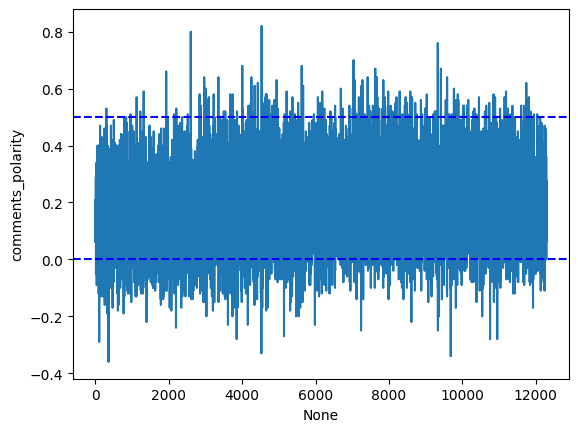

In [83]:
sns.lineplot(data=sentiment_comment_mean, x=sentiment_comment_mean.index , y='comments_polarity')
# Add a line for y=0
plt.axhline(y=0, color='b', linestyle='--')
plt.axhline(y=0.5, color='b', linestyle='--')

plt.savefig('../images/Comment_polarity.png')

plt.show()

# Merge Video Metrics and Time Stamp 

In [84]:
df_merged = pd.merge(df, df_time_merged, on='video_id', how='left')

In [85]:
df_merged

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,cleaned_title1,cleaned_title_lemmatized,final_title,cleaned_description,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,time_passed_since_published
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,2020-08-12 00:00:00+00:00,1123529,39289,3626,It is what it is.... New drop coming this mont...,...,fought bryce hall mike majlak lana rhoades ste...,fought bryce hall mike majlak lana rhoades ste...,fought bryce hall mike majlak lana rhoades ste...,It is what it is New drop coming this month,1.605041e+05,5612.714286,518.000000,148.29,0.0,1428
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,2020-08-12 00:00:00+00:00,1120675,41671,5282,Brooklyn is going on TEN DATES in TEN DAYS! (T...,...,brooklyn dates days meet jorge date,brooklyn date day meet jorge date,brooklyn date day meet jorge,Brooklyn is going on TEN DATES in TEN DAYS This,1.600964e+05,5953.000000,754.571429,146.88,0.0,1428
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,2020-08-13 00:00:00+00:00,3363606,279004,13270,LISTEN TO DAYLIGHT: https://88rising.lnk.to/Da...,...,joji diplo daylight official music video,joji diplo daylight official music video,joji diplo daylight official music video,NaN,4.805151e+05,39857.714286,1895.714286,128.00,1.0,1427
3,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,2020-08-12 00:00:00+00:00,1722152,169501,7263,badum tss *funny haha noises*YOU CAN FIND US H...,...,son lemme teach new,son lem me teach new,son lem teach new,NaN,2.870253e+05,28250.166667,1210.500000,124.21,0.0,1427
4,kz7gHA2N6nQ,"World's Strongest Man vs $10,000 Safe! *unbrea...",2020-08-06 20:56:22+00:00,UCXg4rJUbDP1IP3TmZ9KDpJg,Brianna,2020-08-13 00:00:00+00:00,2542951,55024,5796,"World's Strongest Man vs $10,000 Safe! *unbrea...",...,world strongest man safe unbreakable,world strong man safe unbreakable,world strong man safe unbreakable,Worlds Strongest Man vs Safe with Brianna,3.632787e+05,7860.571429,828.000000,123.06,1.0,1427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,AYDICzSsjmY,I Built a LEGO WATER PARK,2024-04-13 13:00:12+00:00,UC6889KWo5GDEqcYaym1lq9g,MasterBuilders,2024-04-15 00:00:00+00:00,296206,7914,581,"I built a GIANT Lego water park with pools, wa...",...,built lego water park,build lego water park,build lego water park,I built a GIANT Lego water park with pools water,1.481030e+05,3957.000000,290.500000,11.00,1.0,81
12363,8Tt5hh7gVVw,I Tested 1-Star Hotels (again),2024-04-13 15:00:04+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,2024-04-15 00:00:00+00:00,4532769,175418,11464,jammy time,...,tested star hotels,test star hotel,test star hotel,NaN,2.266384e+06,87709.000000,5732.000000,9.00,1.0,81
12364,8p9NPLvlrv0,I Tried Every Airline In America,2024-04-13 16:23:06+00:00,UCyps-v4WNjWDnYRKmZ4BUGw,Airrack,2024-04-15 00:00:00+00:00,743605,38774,2897,Follow me on Instagram!INSTAGRAM ▶️ https://ur...,...,tried airline america,tried airline america,tried airline america,NaN,3.718025e+05,19387.000000,1448.500000,7.62,1.0,81
12365,4MxNTXCRDOs,Family Photo Booth & Shopping In Town,2024-04-14 07:01:03+00:00,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,2024-04-15 00:00:00+00:00,167147,11334,425,► Family Photo Booth & Shopping In Town• Ad • ...,...,family photo booth shopping town,family photo booth shopping town,family photo booth shopping town,Family Photo Booth Shopping In Town Ad,1.671470e+05,11334.000000,425.000000,16.98,0.0,80


In [86]:
df_merged.isnull().sum()

video_id                          0
title                             0
publishedAt                       0
channelId                         0
channelTitle                      0
trending_date                     0
views                             0
likes                             0
comments                          0
description                     435
categoryTitle                     0
TotalDuration(sec)                0
TotalViews                        3
Videos                            3
comments_thread                  76
channel_views_per_video           7
Engagement Rate1                  0
LikeRatio1                        0
CommentRatio1                     0
DayOfWeek                         0
TimeOfDay                         0
TitleLength                       0
cleaned_title                     0
cleaned_title1                    0
cleaned_title_lemmatized          0
final_title                       0
cleaned_description            3397
views_velocity              

In [87]:
df_merged.dropna(subset = 'views_velocity', inplace = True)

In [88]:
df_merged.reset_index(drop=True, inplace = True)
df_merged

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,cleaned_title1,cleaned_title_lemmatized,final_title,cleaned_description,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,time_passed_since_published
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,2020-08-12 00:00:00+00:00,1123529,39289,3626,It is what it is.... New drop coming this mont...,...,fought bryce hall mike majlak lana rhoades ste...,fought bryce hall mike majlak lana rhoades ste...,fought bryce hall mike majlak lana rhoades ste...,It is what it is New drop coming this month,1.605041e+05,5612.714286,518.000000,148.29,0.0,1428
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,2020-08-12 00:00:00+00:00,1120675,41671,5282,Brooklyn is going on TEN DATES in TEN DAYS! (T...,...,brooklyn dates days meet jorge date,brooklyn date day meet jorge date,brooklyn date day meet jorge,Brooklyn is going on TEN DATES in TEN DAYS This,1.600964e+05,5953.000000,754.571429,146.88,0.0,1428
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,2020-08-13 00:00:00+00:00,3363606,279004,13270,LISTEN TO DAYLIGHT: https://88rising.lnk.to/Da...,...,joji diplo daylight official music video,joji diplo daylight official music video,joji diplo daylight official music video,NaN,4.805151e+05,39857.714286,1895.714286,128.00,1.0,1427
3,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,2020-08-12 00:00:00+00:00,1722152,169501,7263,badum tss *funny haha noises*YOU CAN FIND US H...,...,son lemme teach new,son lem me teach new,son lem teach new,NaN,2.870253e+05,28250.166667,1210.500000,124.21,0.0,1427
4,kz7gHA2N6nQ,"World's Strongest Man vs $10,000 Safe! *unbrea...",2020-08-06 20:56:22+00:00,UCXg4rJUbDP1IP3TmZ9KDpJg,Brianna,2020-08-13 00:00:00+00:00,2542951,55024,5796,"World's Strongest Man vs $10,000 Safe! *unbrea...",...,world strongest man safe unbreakable,world strong man safe unbreakable,world strong man safe unbreakable,Worlds Strongest Man vs Safe with Brianna,3.632787e+05,7860.571429,828.000000,123.06,1.0,1427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12360,AYDICzSsjmY,I Built a LEGO WATER PARK,2024-04-13 13:00:12+00:00,UC6889KWo5GDEqcYaym1lq9g,MasterBuilders,2024-04-15 00:00:00+00:00,296206,7914,581,"I built a GIANT Lego water park with pools, wa...",...,built lego water park,build lego water park,build lego water park,I built a GIANT Lego water park with pools water,1.481030e+05,3957.000000,290.500000,11.00,1.0,81
12361,8Tt5hh7gVVw,I Tested 1-Star Hotels (again),2024-04-13 15:00:04+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,2024-04-15 00:00:00+00:00,4532769,175418,11464,jammy time,...,tested star hotels,test star hotel,test star hotel,NaN,2.266384e+06,87709.000000,5732.000000,9.00,1.0,81
12362,8p9NPLvlrv0,I Tried Every Airline In America,2024-04-13 16:23:06+00:00,UCyps-v4WNjWDnYRKmZ4BUGw,Airrack,2024-04-15 00:00:00+00:00,743605,38774,2897,Follow me on Instagram!INSTAGRAM ▶️ https://ur...,...,tried airline america,tried airline america,tried airline america,NaN,3.718025e+05,19387.000000,1448.500000,7.62,1.0,81
12363,4MxNTXCRDOs,Family Photo Booth & Shopping In Town,2024-04-14 07:01:03+00:00,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,2024-04-15 00:00:00+00:00,167147,11334,425,► Family Photo Booth & Shopping In Town• Ad • ...,...,family photo booth shopping town,family photo booth shopping town,family photo booth shopping town,Family Photo Booth Shopping In Town Ad,1.671470e+05,11334.000000,425.000000,16.98,0.0,80


# Add mean polarity of comment thread

In [89]:
df_merged_all = pd.merge(df_merged, sentiment_comment_mean, on='video_id', how='left')

In [90]:
df_merged_all

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,time_passed_since_published,comments_polarity,std_polarity,comments_subjectivity,std_subjectivity
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,2020-08-12 00:00:00+00:00,1123529,39289,3626,It is what it is.... New drop coming this mont...,...,1.605041e+05,5612.714286,518.000000,148.29,0.0,1428,0.11,0.34,0.50,0.35
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,2020-08-12 00:00:00+00:00,1120675,41671,5282,Brooklyn is going on TEN DATES in TEN DAYS! (T...,...,1.600964e+05,5953.000000,754.571429,146.88,0.0,1428,0.10,0.34,0.38,0.41
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,2020-08-13 00:00:00+00:00,3363606,279004,13270,LISTEN TO DAYLIGHT: https://88rising.lnk.to/Da...,...,4.805151e+05,39857.714286,1895.714286,128.00,1.0,1427,0.06,0.41,0.37,0.30
3,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,2020-08-12 00:00:00+00:00,1722152,169501,7263,badum tss *funny haha noises*YOU CAN FIND US H...,...,2.870253e+05,28250.166667,1210.500000,124.21,0.0,1427,0.21,0.19,0.29,0.26
4,kz7gHA2N6nQ,"World's Strongest Man vs $10,000 Safe! *unbrea...",2020-08-06 20:56:22+00:00,UCXg4rJUbDP1IP3TmZ9KDpJg,Brianna,2020-08-13 00:00:00+00:00,2542951,55024,5796,"World's Strongest Man vs $10,000 Safe! *unbrea...",...,3.632787e+05,7860.571429,828.000000,123.06,1.0,1427,0.12,0.37,0.31,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12360,AYDICzSsjmY,I Built a LEGO WATER PARK,2024-04-13 13:00:12+00:00,UC6889KWo5GDEqcYaym1lq9g,MasterBuilders,2024-04-15 00:00:00+00:00,296206,7914,581,"I built a GIANT Lego water park with pools, wa...",...,1.481030e+05,3957.000000,290.500000,11.00,1.0,81,0.28,0.25,0.53,0.28
12361,8Tt5hh7gVVw,I Tested 1-Star Hotels (again),2024-04-13 15:00:04+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,2024-04-15 00:00:00+00:00,4532769,175418,11464,jammy time,...,2.266384e+06,87709.000000,5732.000000,9.00,1.0,81,0.11,0.22,0.35,0.34
12362,8p9NPLvlrv0,I Tried Every Airline In America,2024-04-13 16:23:06+00:00,UCyps-v4WNjWDnYRKmZ4BUGw,Airrack,2024-04-15 00:00:00+00:00,743605,38774,2897,Follow me on Instagram!INSTAGRAM ▶️ https://ur...,...,3.718025e+05,19387.000000,1448.500000,7.62,1.0,81,0.00,0.48,0.36,0.42
12363,4MxNTXCRDOs,Family Photo Booth & Shopping In Town,2024-04-14 07:01:03+00:00,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,2024-04-15 00:00:00+00:00,167147,11334,425,► Family Photo Booth & Shopping In Town• Ad • ...,...,1.671470e+05,11334.000000,425.000000,16.98,0.0,80,0.29,0.29,0.43,0.31


# Exploratory Data Analysis (EDA)

In [91]:
df = df_merged_all.copy()

- https://www.designrush.com/news/discord-breaks-youtube-records-with-billion-views-in-24-hours

In [92]:
df.sort_values(by = 'views_velocity', ascending=False).head()

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,time_passed_since_published,comments_polarity,std_polarity,comments_subjectivity,std_subjectivity
12289,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,2024-04-13 00:00:00+00:00,3449980,200129,21258,Why would we ever bring Loot Boxes into a chat...,...,1.173036e+08,1.667742e+04,1771.500000,6.23,11.0,93,0.07,0.19,0.18,0.23
8577,CocEMWdc7Ck,SHAKIRA || BZRP Music Sessions #53,2023-01-12 00:00:07+00:00,UCmS75G-98QihSusY7NfCZtw,Bizarrap,2023-01-20 00:00:00+00:00,158477831,8333879,468245,SHAKIRA || BZRP Music Sessions #53Lyrics by: h...,...,1.980973e+07,1.041735e+06,58530.625000,24.00,7.0,538,0.05,0.16,0.05,0.15
4322,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",2021-11-24 21:00:01+00:00,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,2021-12-02 00:00:00+00:00,137068663,10926910,527142,MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,...,1.713358e+07,1.365864e+06,65892.750000,3.00,7.0,952,0.17,0.58,0.55,0.33
12330,wboGYls1Bns,Pushpa 2 The Rule Teaser | Allu Arjun | Sukuma...,2024-04-08 05:37:05+00:00,UCKZSn5C-RzrLjuWJF8wWiDw,Mythri Movie Makers,2024-04-15 00:00:00+00:00,112497953,1634699,54080,Pushpa 2 The Rule Teaser on Mythri Movie Maker...,...,1.607114e+07,2.335284e+05,7725.714286,18.38,6.0,86,0.06,0.14,0.21,0.35
10111,bUR_FKt7Iso,"Salaar Teaser | Prabhas, Prashanth Neel, Prith...",2023-07-05 23:41:10+00:00,UCarJoVXH0T2pdtcHBu9J8Bw,Hombale Films,2023-07-13 00:00:00+00:00,116910737,2213134,109257,THE MOST VIOLENT MEN... CALLED ONE MAN... THE ...,...,1.461384e+07,2.766418e+05,13657.125000,24.31,6.0,364,0.09,0.20,0.11,0.24


In [93]:
df = df[df['video_id'] != 'cc2-4ci4G84']

In [94]:
df.reset_index(drop=True, inplace=True)

In [95]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,trending_date,views,likes,comments,description,...,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,time_passed_since_published,comments_polarity,std_polarity,comments_subjectivity,std_subjectivity
0,hpMeCem6Hss,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",2020-08-05 19:42:52+00:00,UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,2020-08-12 00:00:00+00:00,1123529,39289,3626,It is what it is.... New drop coming this mont...,...,160504.142857,5612.714286,518.000000,148.29,0.0,1428,0.11,0.34,0.50,0.35
1,K_uCyxNsHpo,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,2020-08-05 21:07:19+00:00,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,2020-08-12 00:00:00+00:00,1120675,41671,5282,Brooklyn is going on TEN DATES in TEN DAYS! (T...,...,160096.428571,5953.000000,754.571429,146.88,0.0,1428,0.10,0.34,0.38,0.41
2,v97FPN2US2o,Joji & Diplo - Daylight (Official Music Video),2020-08-06 16:00:09+00:00,UCZW5lIUz93q_aZIkJPAC0IQ,88rising,2020-08-13 00:00:00+00:00,3363606,279004,13270,LISTEN TO DAYLIGHT: https://88rising.lnk.to/Da...,...,480515.142857,39857.714286,1895.714286,128.00,1.0,1427,0.06,0.41,0.37,0.30
3,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,2020-08-12 00:00:00+00:00,1722152,169501,7263,badum tss *funny haha noises*YOU CAN FIND US H...,...,287025.333333,28250.166667,1210.500000,124.21,0.0,1427,0.21,0.19,0.29,0.26
4,kz7gHA2N6nQ,"World's Strongest Man vs $10,000 Safe! *unbrea...",2020-08-06 20:56:22+00:00,UCXg4rJUbDP1IP3TmZ9KDpJg,Brianna,2020-08-13 00:00:00+00:00,2542951,55024,5796,"World's Strongest Man vs $10,000 Safe! *unbrea...",...,363278.714286,7860.571429,828.000000,123.06,1.0,1427,0.12,0.37,0.31,0.30


In [96]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'views', 'likes', 'comments', 'description',
       'categoryTitle', 'TotalDuration(sec)', 'TotalViews', 'Videos',
       'comments_thread', 'channel_views_per_video', 'Engagement Rate1',
       'LikeRatio1', 'CommentRatio1', 'DayOfWeek', 'TimeOfDay', 'TitleLength',
       'cleaned_title', 'cleaned_title1', 'cleaned_title_lemmatized',
       'final_title', 'cleaned_description', 'views_velocity',
       'likes_velocity', 'comments_velocity', 'time_to_trend_hr',
       'trending_duration_days', 'time_passed_since_published',
       'comments_polarity', 'std_polarity', 'comments_subjectivity',
       'std_subjectivity'],
      dtype='object')

## Descriptive Statistics

In [97]:
numerical_features_df = df[['views', 'LikeRatio1', 'CommentRatio1', 'DayOfWeek', 'TimeOfDay', 'TotalDuration(sec)', 'TitleLength',
                           'views_velocity', 'likes_velocity', 'comments_velocity', 'time_to_trend_hr', 'trending_duration_days',
                            'comments_polarity','channel_views_per_video'] ]

In [98]:
numerical_features_df

,views,LikeRatio1,CommentRatio1,DayOfWeek,TimeOfDay,TotalDuration(sec),TitleLength,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,comments_polarity,channel_views_per_video
0,1123529,34.97,3.23,2,19.70,299.0,92,1.605041e+05,5612.714286,518.000000,148.29,0.0,0.11,1.307609e+06
1,1120675,37.18,4.71,2,21.12,640.0,53,1.600964e+05,5953.000000,754.571429,146.88,0.0,0.10,1.913400e+06
2,3363606,82.95,3.95,3,16.00,236.0,46,4.805151e+05,39857.714286,1895.714286,128.00,1.0,0.06,3.028757e+06
3,1722152,98.42,4.22,3,19.78,43.0,34,2.870253e+05,28250.166667,1210.500000,124.21,0.0,0.21,1.244633e+06
4,2542951,21.64,2.28,3,20.93,1026.0,52,3.632787e+05,7860.571429,828.000000,123.06,1.0,0.12,7.102805e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12359,296206,26.72,1.96,5,13.00,754.0,25,1.481030e+05,3957.000000,290.500000,11.00,1.0,0.28,1.011346e+06
12360,4532769,38.70,2.53,5,15.00,1789.0,30,2.266384e+06,87709.000000,5732.000000,9.00,1.0,0.11,8.769504e+06
12361,743605,52.14,3.90,5,16.38,1517.0,32,3.718025e+05,19387.000000,1448.500000,7.62,1.0,0.00,1.332728e+07
12362,167147,67.81,2.54,6,7.02,1895.0,37,1.671470e+05,11334.000000,425.000000,16.98,0.0,0.29,6.789606e+05


In [99]:
summary_stats = numerical_features_df.describe()
summary_stats

C:\Users\salto\Documents\DataAnalytics\ModuleFinalProject\m4_venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,views,LikeRatio1,CommentRatio1,DayOfWeek,TimeOfDay,TotalDuration(sec),TitleLength,views_velocity,likes_velocity,comments_velocity,time_to_trend_hr,trending_duration_days,comments_polarity,channel_views_per_video
count,1.236400e+04,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,1.236400e+04,1.236400e+04,12364.000000,12364.000000,12364.000000,12288.000000,1.235700e+04
mean,3.018888e+06,51.791758,3.604842,2.880379,15.132891,809.950663,47.684083,4.214798e+05,1.962111e+04,1167.230350,21.894072,4.863960,0.193162,inf
std,8.741901e+06,32.049547,4.068423,2.015030,6.442010,852.499445,20.274497,8.545310e+05,4.118599e+04,3151.992626,17.302864,2.183953,0.134972,NaN
min,7.699200e+04,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.140500e+04,2.545455e+00,0.000000,-9.080000,0.000000,-0.360000,1.178287e+03
25%,5.520018e+05,29.637500,1.367500,1.000000,13.250000,212.750000,33.000000,9.276509e+04,3.742267e+03,215.842857,9.000000,4.000000,0.100000,4.817571e+05
50%,1.110263e+06,47.290000,2.580000,3.000000,17.000000,633.000000,45.000000,1.806750e+05,7.829143e+03,445.342857,23.500000,5.000000,0.190000,1.332643e+06
75%,2.544274e+06,67.390000,4.450000,5.000000,19.870000,1122.000000,59.000000,4.048511e+05,1.887011e+04,1006.785714,28.732500,6.000000,0.280000,3.515306e+06
max,2.062023e+08,286.230000,85.760000,6.000000,23.980000,34884.000000,100.000000,1.980973e+07,1.365864e+06,100290.166667,529.860000,36.000000,0.820000,inf


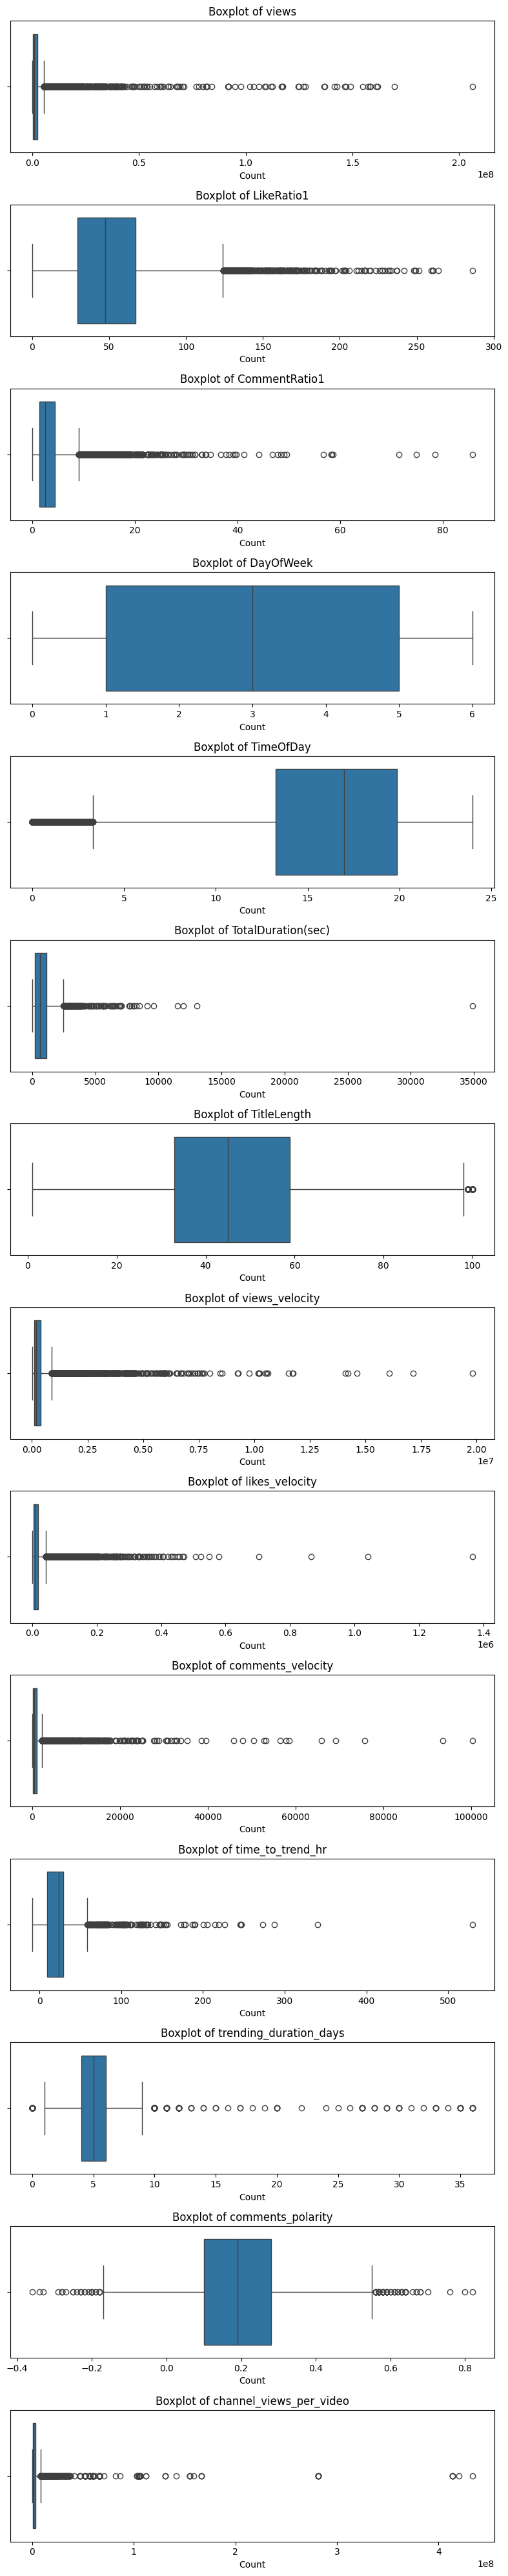

In [100]:
# Define the number of columns for subplots based on the number of features
num_rows = len(numerical_features_df.columns)
num_cols = 1

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 40))  # Adjust figsize as needed

# Iterate through each column and plot histogram vertically
for i, column in enumerate(numerical_features_df.columns):
    sns.boxplot(data=numerical_features_df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

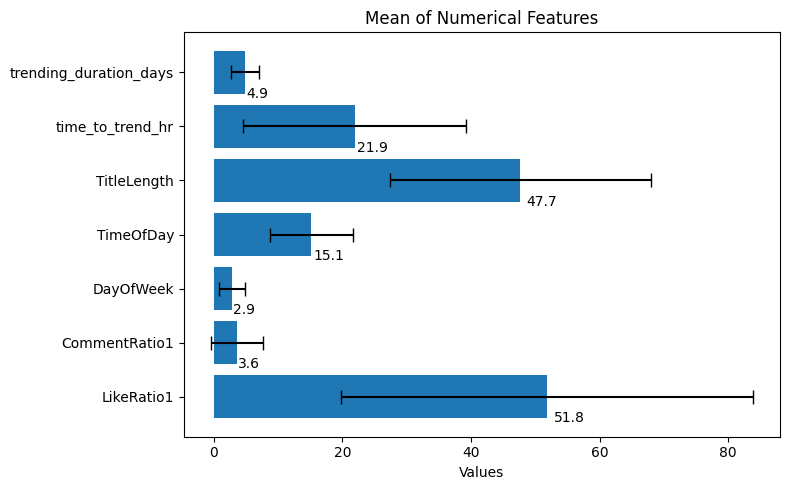

In [101]:
# Calculate summary statistics (mean and std)
summary_stats = numerical_features_df[[ 'LikeRatio1', 'CommentRatio1', 'DayOfWeek', 'TimeOfDay', 'TitleLength', 
                            'time_to_trend_hr', 'trending_duration_days'] ].describe().loc[['mean', 'std']].T

# Plotting
plt.figure(figsize=(8, 5 ))

# Create horizontal bar plot for mean values
bars = plt.barh(summary_stats.index, summary_stats['mean'], xerr=summary_stats['std'], 
                capsize=5, label='Mean')

# Annotate bars with values
for bar, mean_value in zip(bars, summary_stats['mean']):
    plt.text(bar.get_width() + bar.get_width() * 0.02, bar.get_y() + 0.01*bar.get_height()/2, 
             f'{mean_value:.1f}', va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Values')
plt.title('Mean of Numerical Features')

plt.tight_layout()

plt.savefig('../images/Numerical_Features_means.png')

plt.show()

In [102]:
# Calculate correlation matrix
correlation_matrix = numerical_features_df.corr()

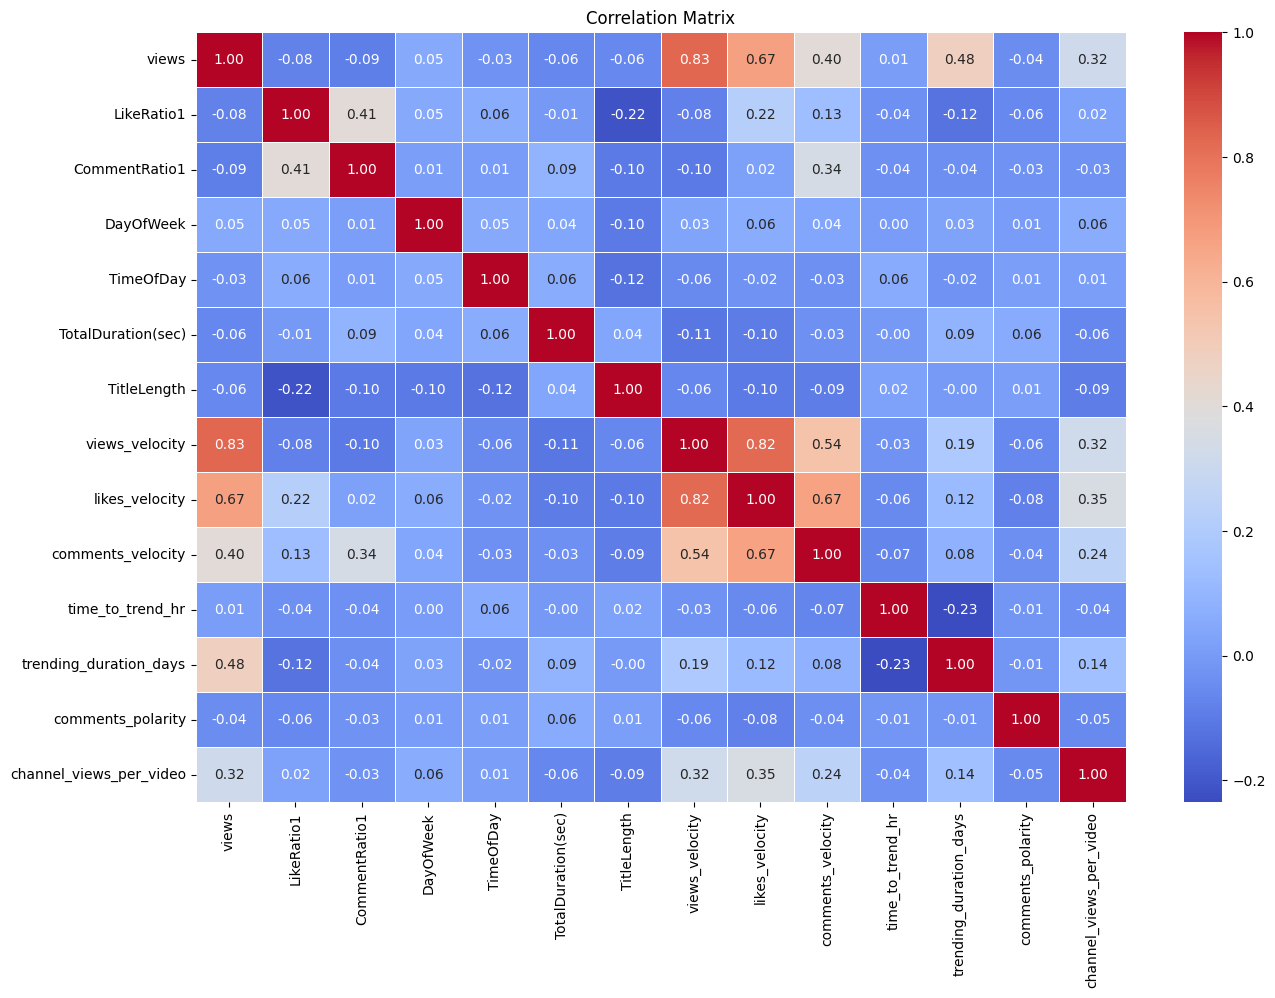

In [103]:
# Plot correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

plt.savefig('../images/Numerical_features_cor_matrix.png')

plt.show()

## Engagement Metrics

In [104]:
# Calculate correlation matrix
engagement_features = numerical_features_df[['views','LikeRatio1', 'CommentRatio1', 'comments_polarity', 'trending_duration_days' ]]

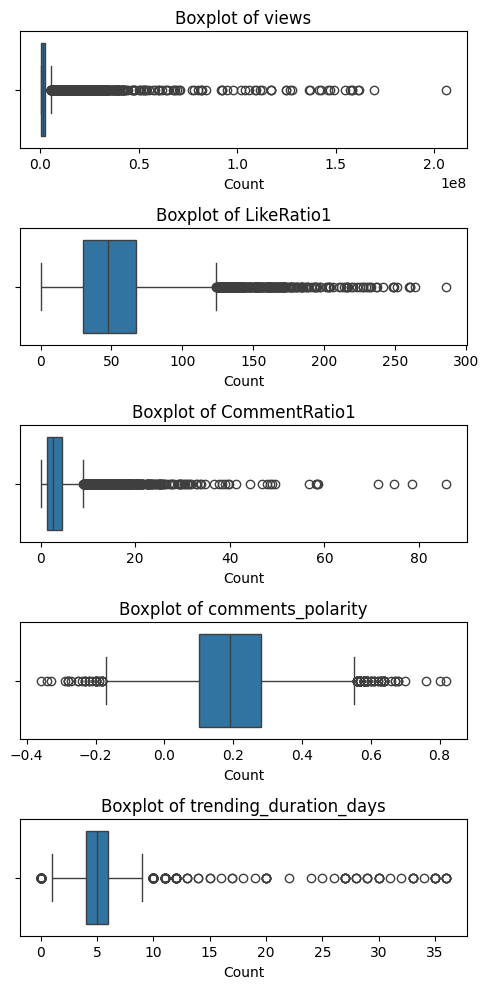

In [105]:
# Define the number of columns for subplots based on the number of features
num_rows = len(engagement_features.columns)
num_cols = 1

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 10))  # Adjust figsize as needed

# Iterate through each column and plot histogram vertically
for i, column in enumerate(engagement_features.columns):
    sns.boxplot(data=numerical_features_df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('Count')

# Adjust layout
plt.tight_layout()
plt.savefig('../images/Engagement_features_boxplots.png')
plt.show()

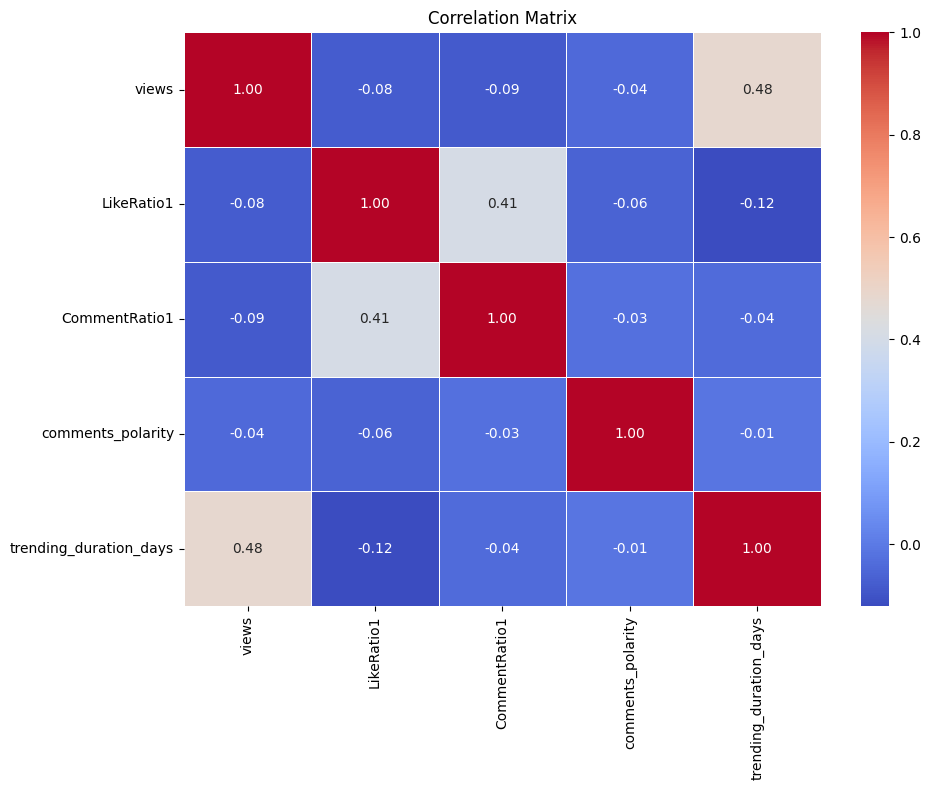

In [106]:
correlation_matrix = engagement_features.corr()
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../images/Engagement_features_cor_matrix.png')

plt.show()

<Figure size 1000x800 with 0 Axes>

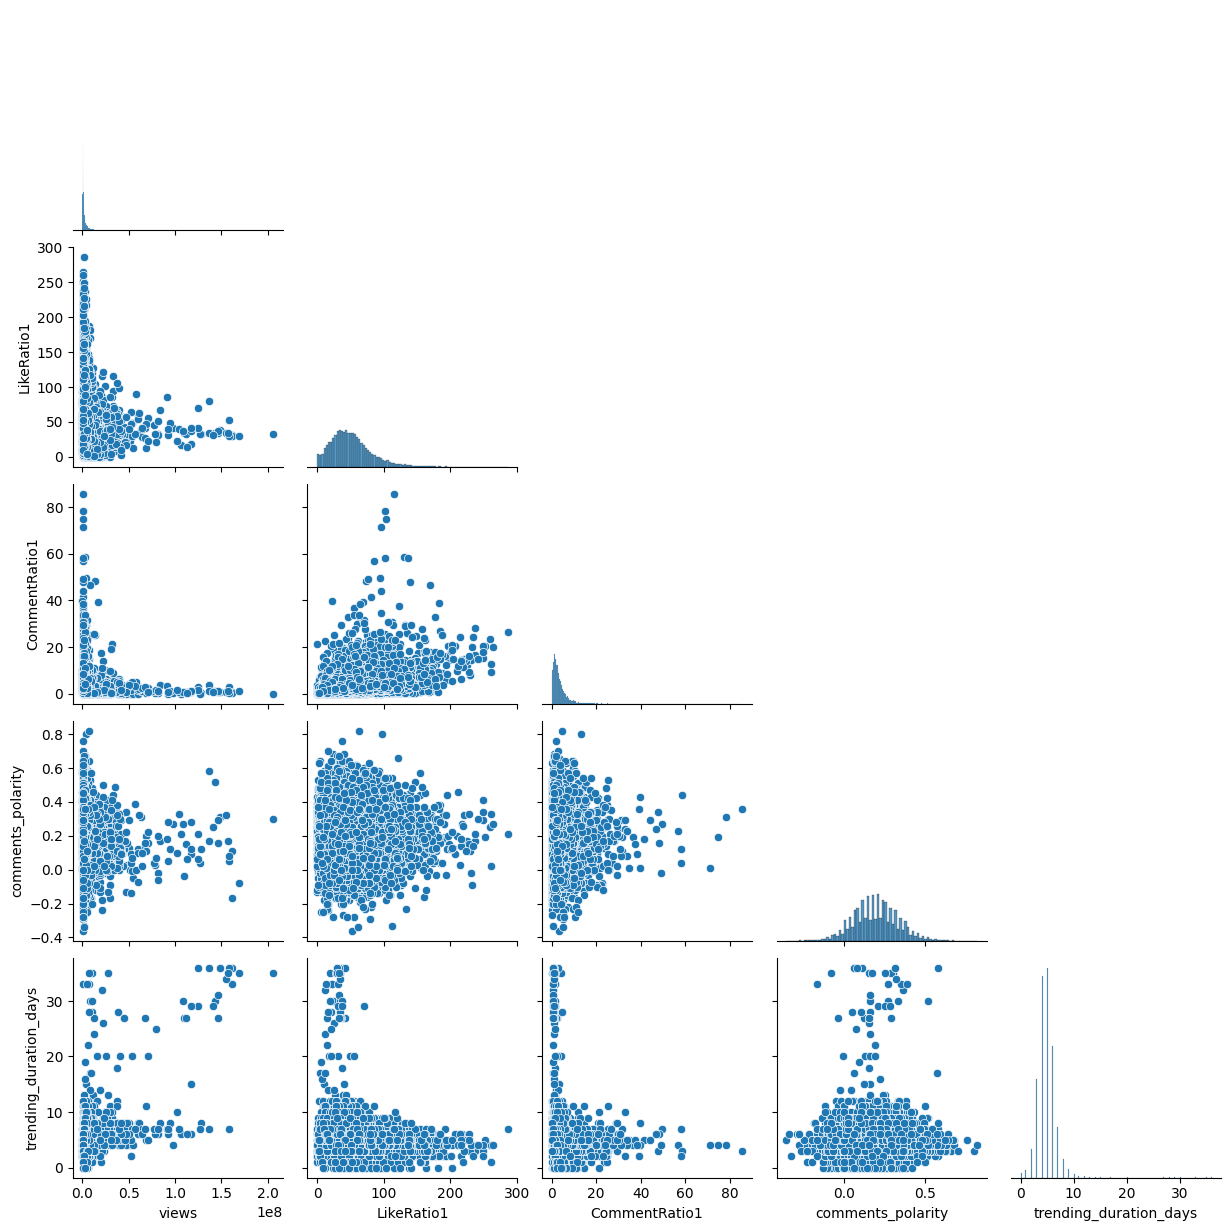

In [107]:
# Create a pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(engagement_features, corner = True)

plt.savefig('../images/Engagement_features_pairplot.png')

# Show the plot
plt.show()

In [108]:
numerical_features_df.columns

Index(['views', 'LikeRatio1', 'CommentRatio1', 'DayOfWeek', 'TimeOfDay',
       'TotalDuration(sec)', 'TitleLength', 'views_velocity', 'likes_velocity',
       'comments_velocity', 'time_to_trend_hr', 'trending_duration_days',
       'comments_polarity', 'channel_views_per_video'],
      dtype='object')

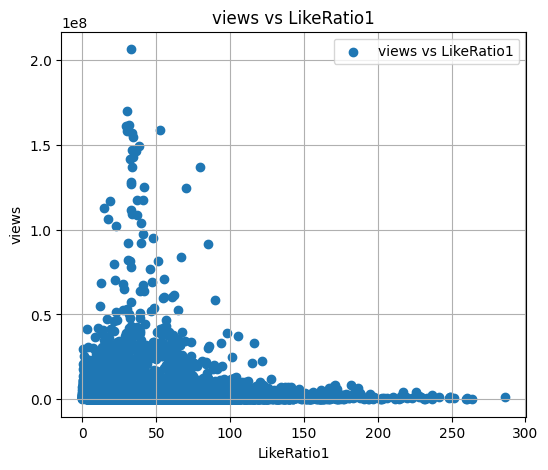

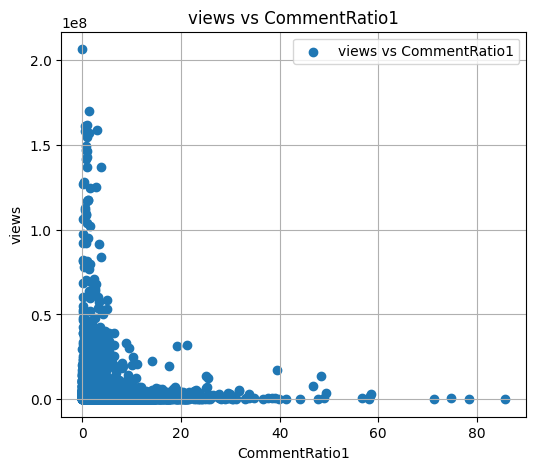

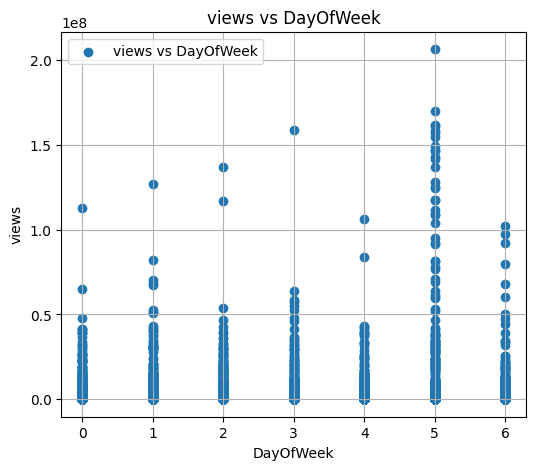

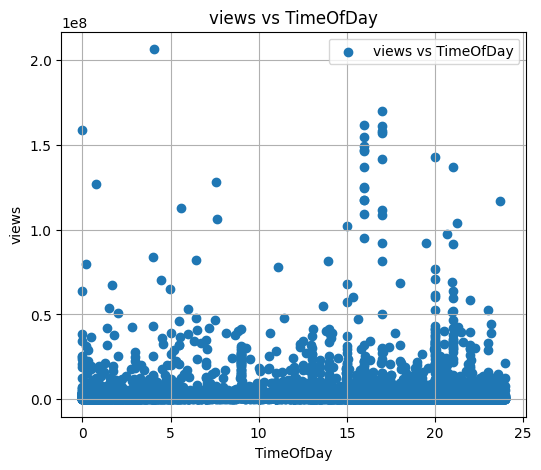

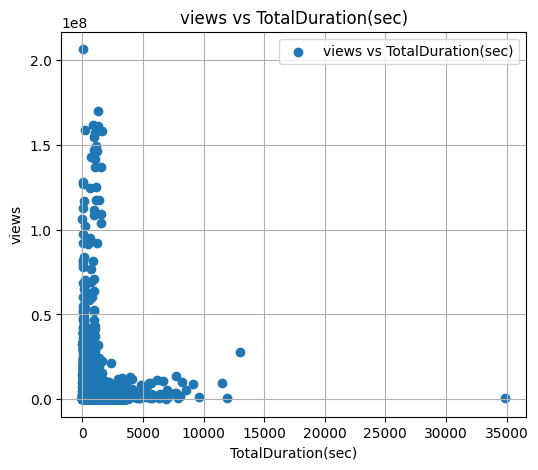

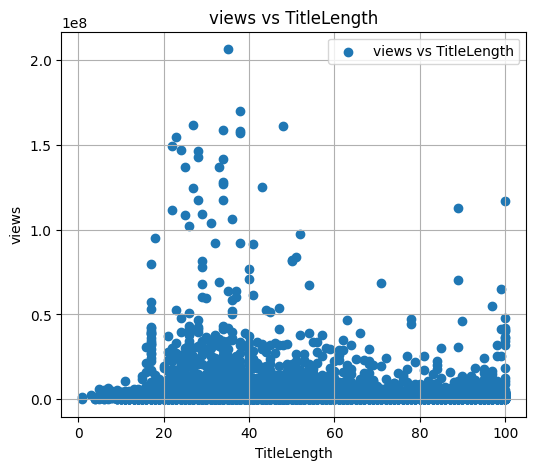

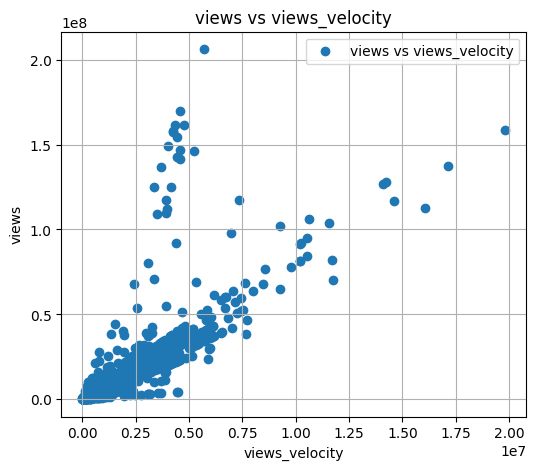

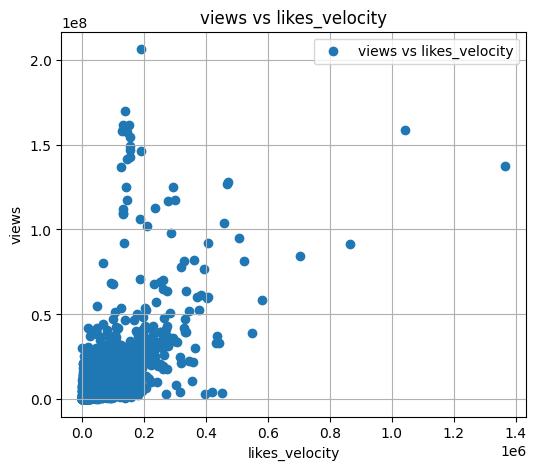

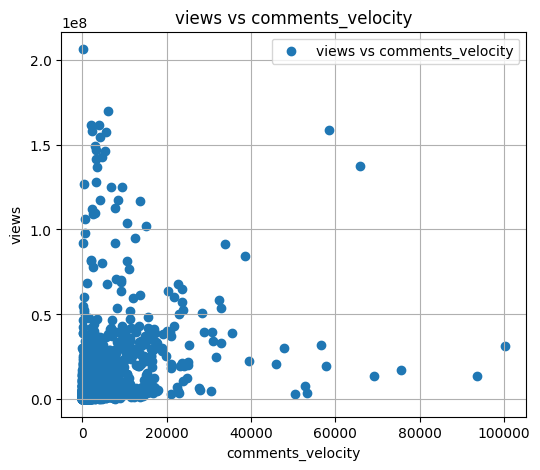

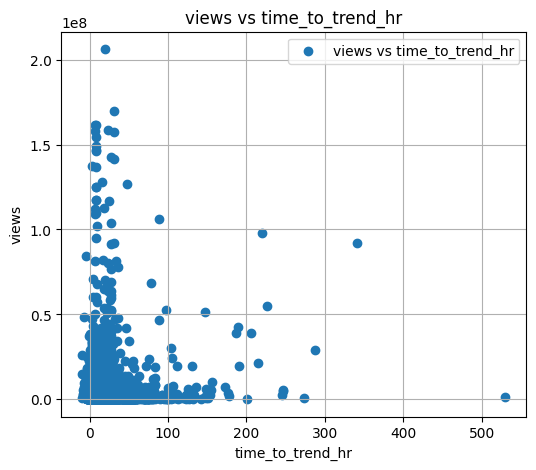

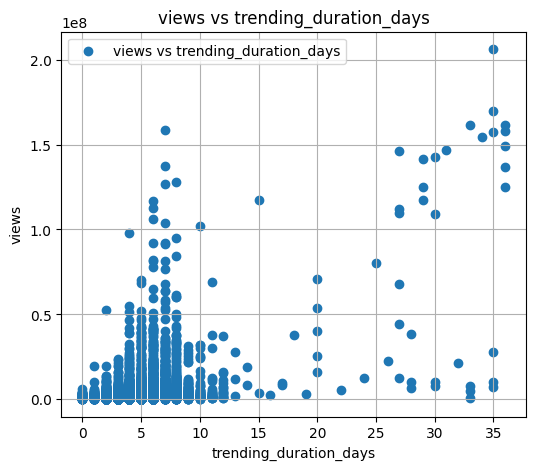

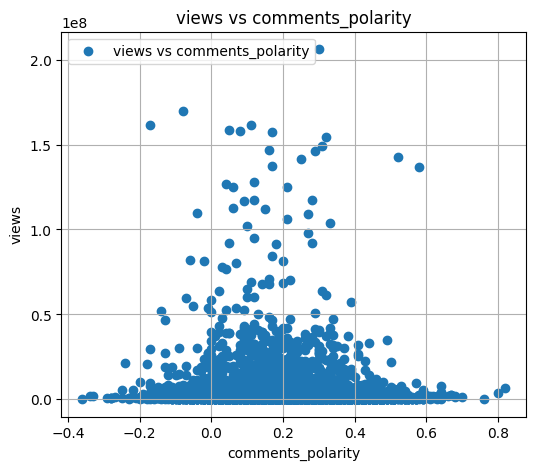

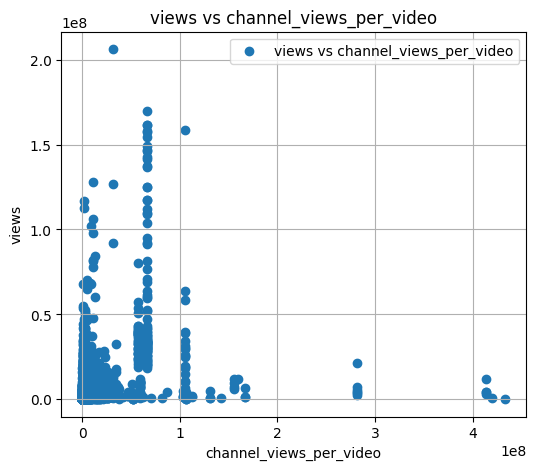

In [109]:
# Choose a column to plot against the rest (e.g., 'A' in this case)
column_to_plot = 'views'

# Get the list of columns excluding the column_to_plot
columns_to_compare = numerical_features_df.columns[numerical_features_df.columns != column_to_plot]

# Plot scatter plots
for col in columns_to_compare:
    plt.figure(figsize=(6, 5))
    plt.scatter(numerical_features_df[col], numerical_features_df[column_to_plot], marker='o', label=f'{column_to_plot} vs {col}')
    plt.xlabel(col)
    plt.ylabel(column_to_plot)
    plt.title(f'{column_to_plot} vs {col}')
    plt.legend()
    plt.grid(True)
    plt.show()

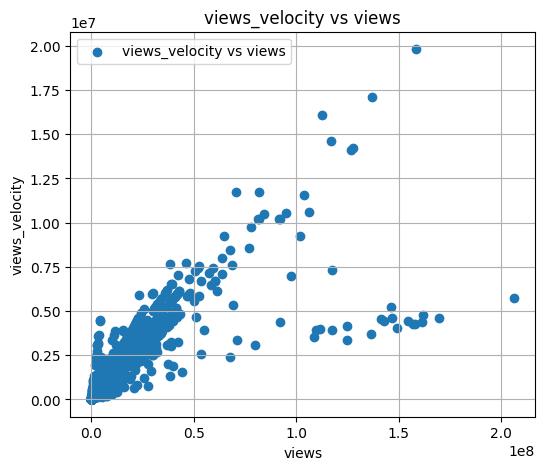

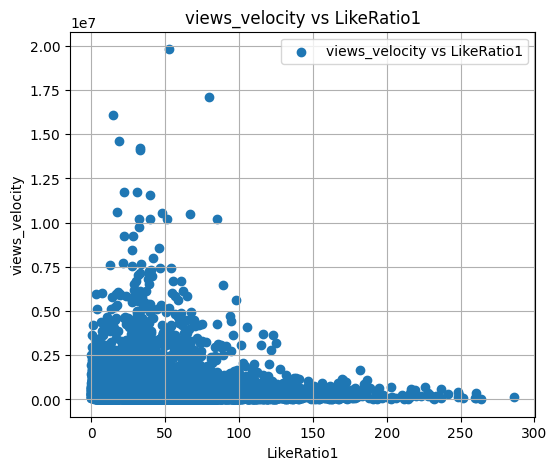

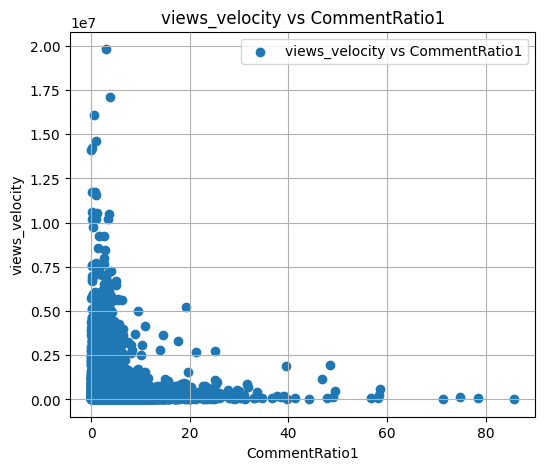

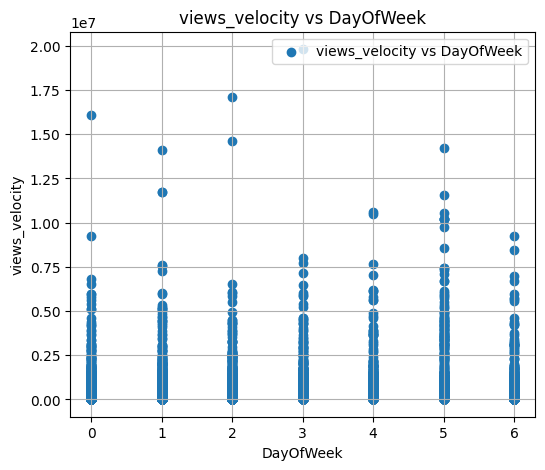

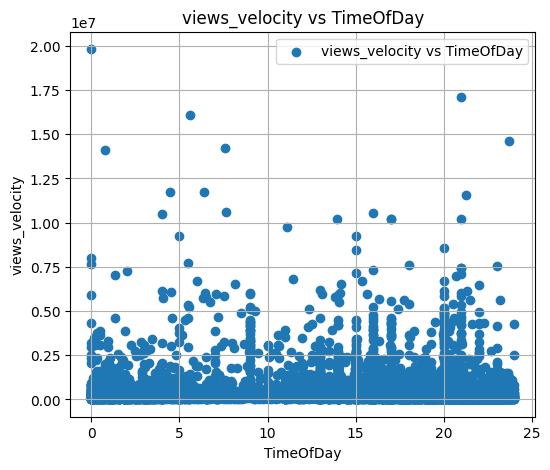

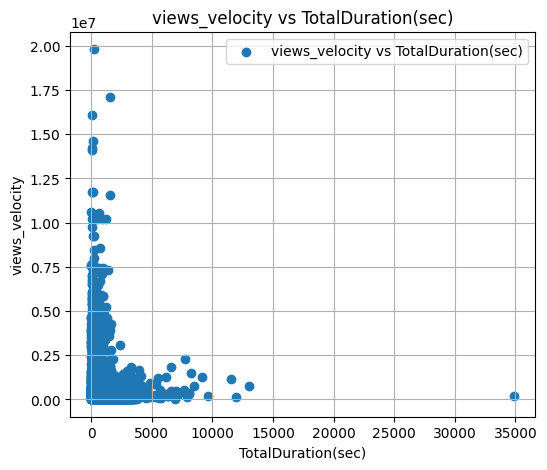

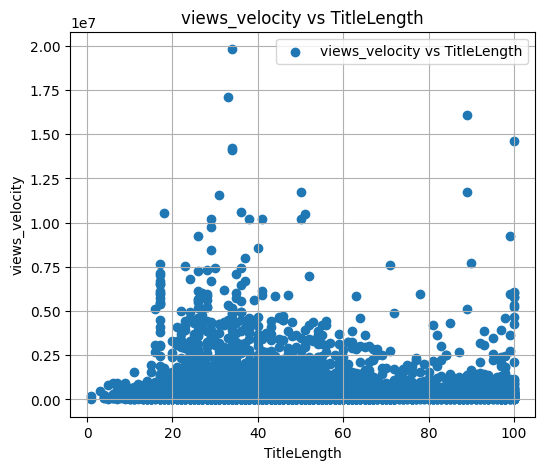

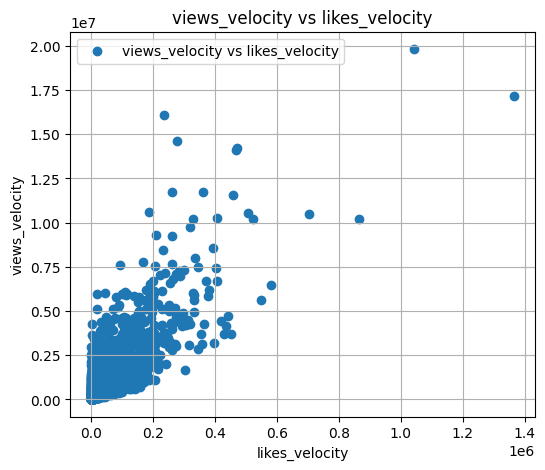

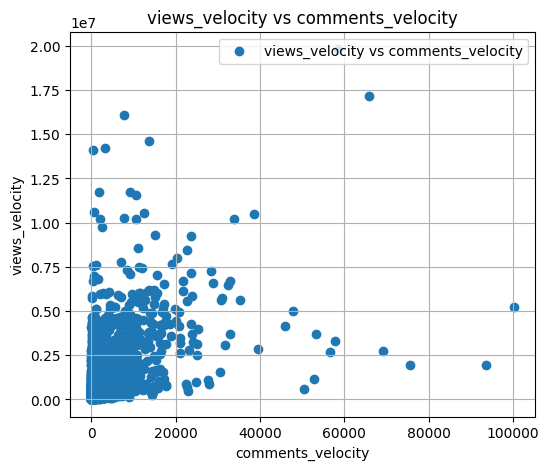

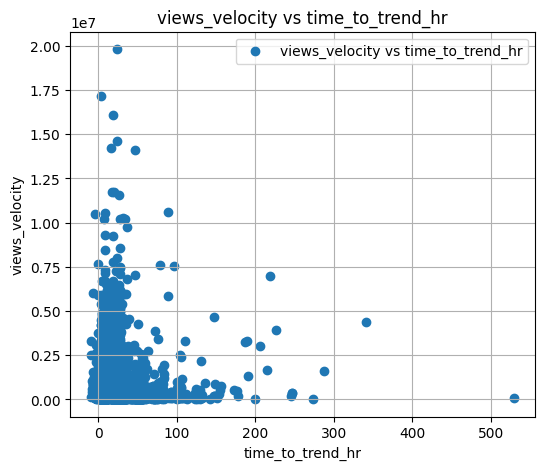

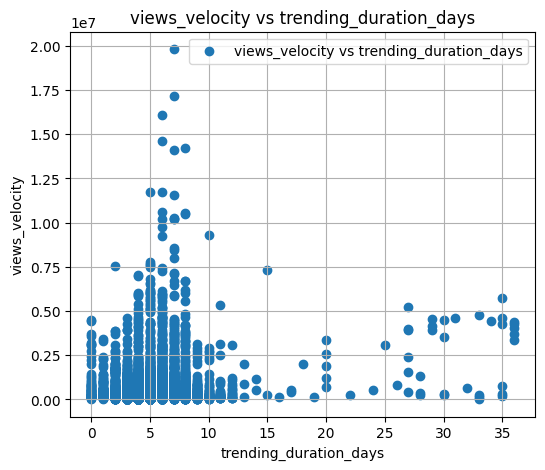

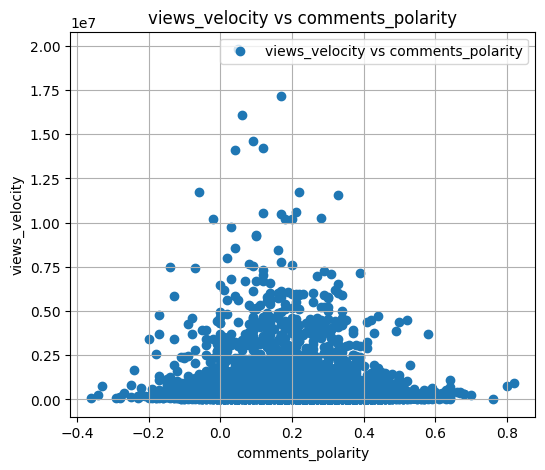

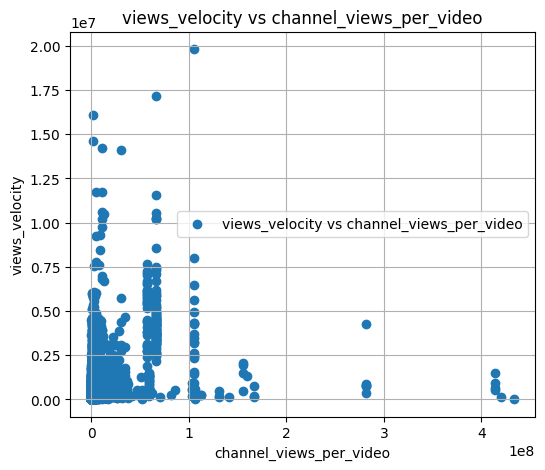

In [110]:
# Choose a column to plot against the rest (e.g., 'A' in this case)
column_to_plot = 'views_velocity'

# Get the list of columns excluding the column_to_plot
columns_to_compare = numerical_features_df.columns[numerical_features_df.columns != column_to_plot]

# Plot scatter plots
for col in columns_to_compare:
    plt.figure(figsize=(6, 5))
    plt.scatter(numerical_features_df[col], numerical_features_df[column_to_plot], marker='o', label=f'{column_to_plot} vs {col}')
    plt.xlabel(col)
    plt.ylabel(column_to_plot)
    plt.title(f'{column_to_plot} vs {col}')
    plt.legend()
    plt.grid(True)
    plt.show()

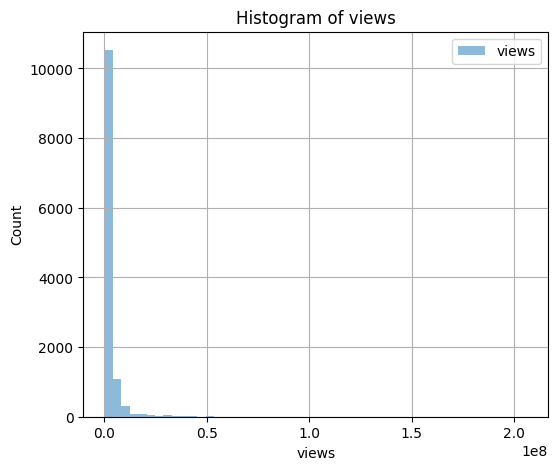

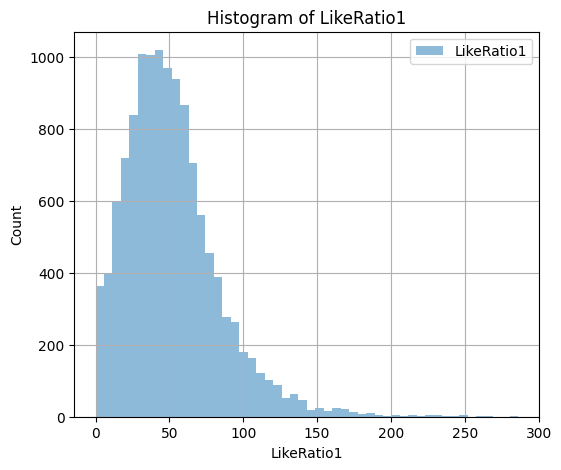

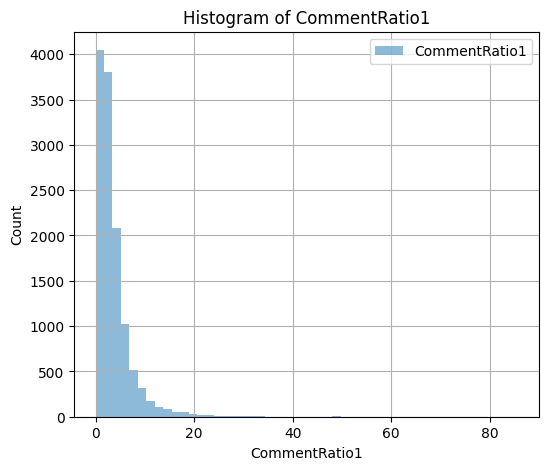

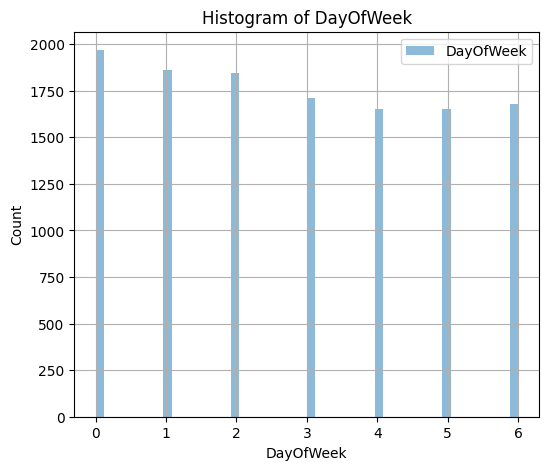

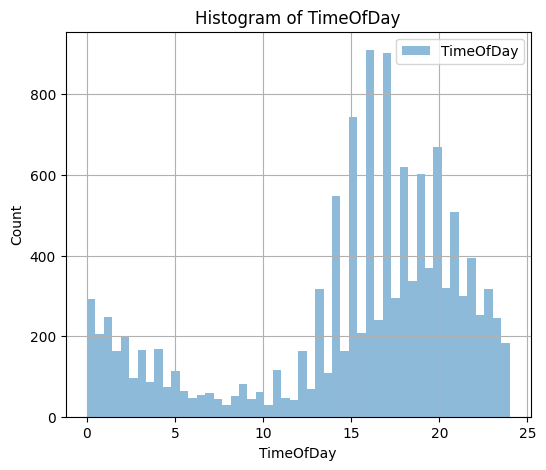

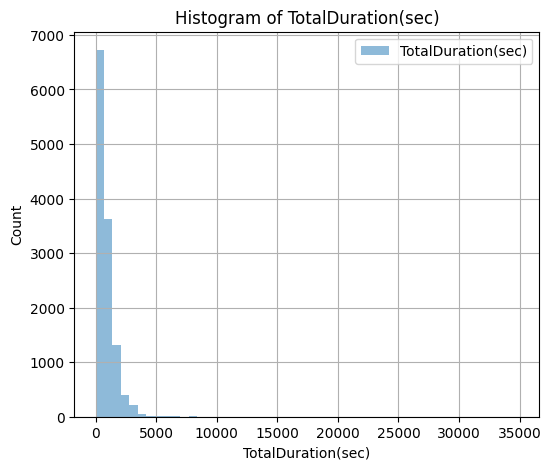

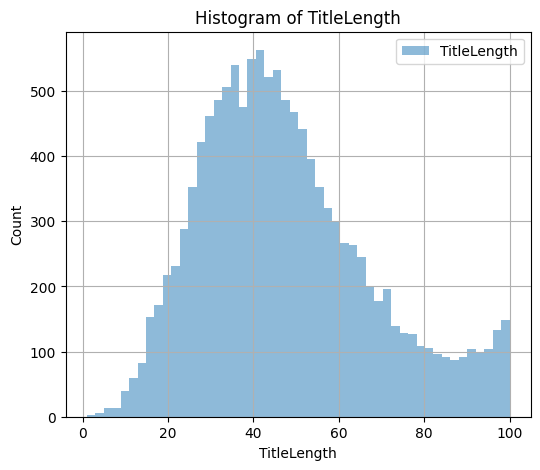

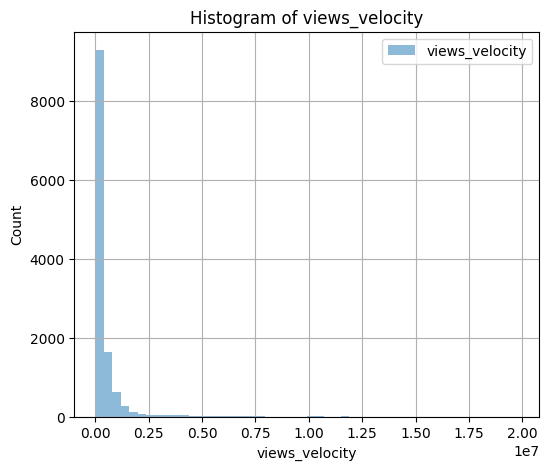

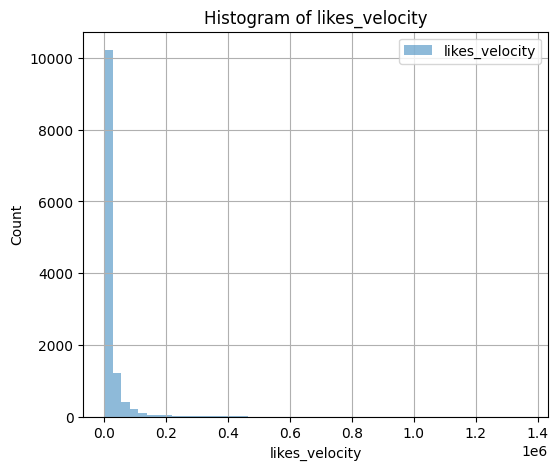

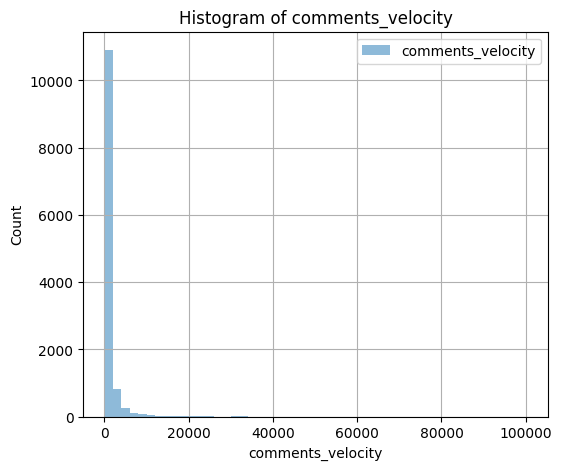

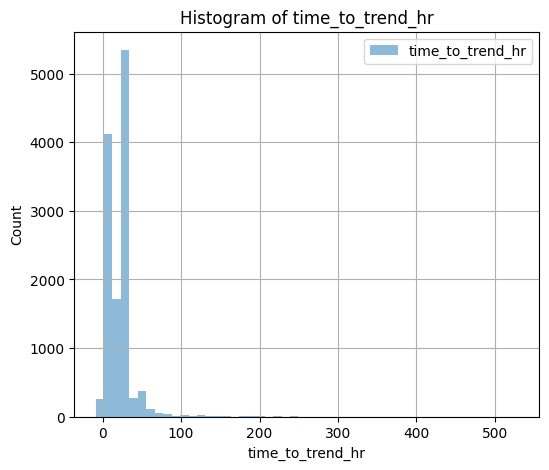

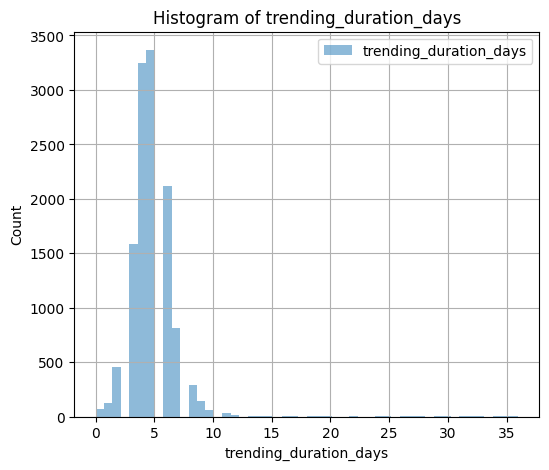

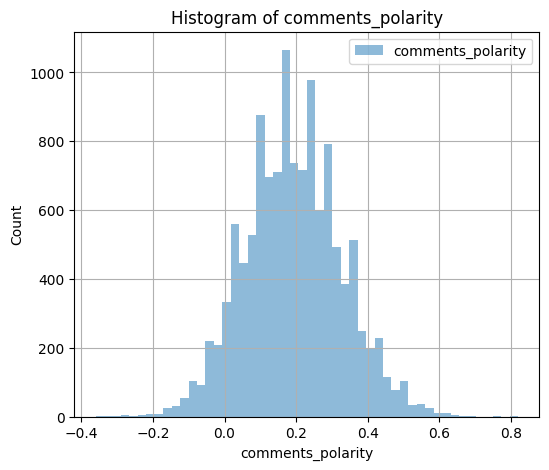

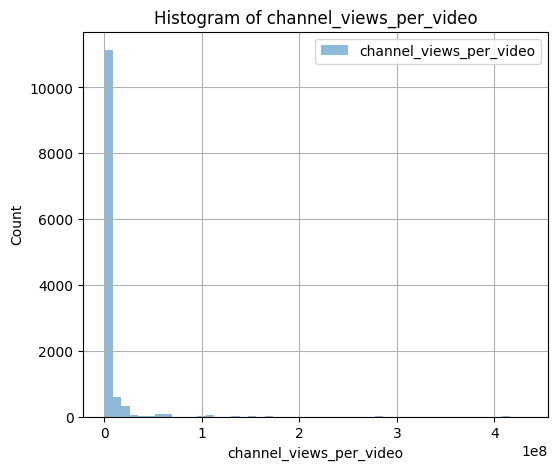

In [111]:
# Get the list of columns excluding the column_to_plot
columns = numerical_features_df.columns

# Plot scatter plots
for col in columns:
    # Filter out infinite and NaN values
    col_data = numerical_features_df[col][np.isfinite(numerical_features_df[col])]
    
    plt.figure(figsize=(6, 5))
    plt.hist(col_data, bins=50, alpha=0.5, label=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [112]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'views', 'likes', 'comments', 'description',
       'categoryTitle', 'TotalDuration(sec)', 'TotalViews', 'Videos',
       'comments_thread', 'channel_views_per_video', 'Engagement Rate1',
       'LikeRatio1', 'CommentRatio1', 'DayOfWeek', 'TimeOfDay', 'TitleLength',
       'cleaned_title', 'cleaned_title1', 'cleaned_title_lemmatized',
       'final_title', 'cleaned_description', 'views_velocity',
       'likes_velocity', 'comments_velocity', 'time_to_trend_hr',
       'trending_duration_days', 'time_passed_since_published',
       'comments_polarity', 'std_polarity', 'comments_subjectivity',
       'std_subjectivity'],
      dtype='object')

In [113]:
# List of columns to delete
columns_to_delete = ['publishedAt', 'TotalViews', 'Videos', 'comments_thread', 'Engagement Rate1', 'cleaned_title',
                     'time_passed_since_published', 'std_polarity', 'comments_subjectivity',
                     'std_subjectivity']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_delete)

In [114]:
df.columns

Index(['video_id', 'title', 'channelId', 'channelTitle', 'trending_date',
       'views', 'likes', 'comments', 'description', 'categoryTitle',
       'TotalDuration(sec)', 'channel_views_per_video', 'LikeRatio1',
       'CommentRatio1', 'DayOfWeek', 'TimeOfDay', 'TitleLength',
       'cleaned_title1', 'cleaned_title_lemmatized', 'final_title',
       'cleaned_description', 'views_velocity', 'likes_velocity',
       'comments_velocity', 'time_to_trend_hr', 'trending_duration_days',
       'comments_polarity'],
      dtype='object')

# DataFrame for modeling meta-data
- video_id: Youtube Video unique ID
- title: Youtube Video Title
- channelId: Youtube Channel unique ID
- channelTitle: Youtube Channel Title
- trending_date: Last trending Date
- views: Youtube Video Views at the last trending date
- likes: Youtube Video Likes at the last trending date
- comments: Youtube Video Comments at the last trending date
- categoryTitle: Youtube Video category
- TotalDuration(sec): Youtube Video Total duration in seconds
- channel_views_per_video: Channel average views per video
- LikeRatio1: Likes per 1000 Views at the last trending date - 1000*Likes/Views
- CommentRatio1: Comments per 1000 Views at the last trending date - 1000*Comments/Views
- DayOfWeek: Published day of week (0: Monday, ..., 6: Sunday)
- TimeOfDay: Published time of day (24 hrs format)
- TitleLength: Youtube Video title total length (in characters, max 100 characters for youtube regulations)
- final_title: Cleaned title with only words
- cleaned description (first 10 words, with extra constrains)
- views_velocity: Velocity of views from published date till last trending date
- likes_velocity: Velocity of likes from published date till last trending date
- comments_velocity: Velocity of Comments from published date till last trending date
- time_to_trend_hr: Time to trend from published date (in hrs)
- trending_duration_days: Trending duration (in days)
- comments_polarity: Average sentiment score of the top 10 comments 

In [115]:
relative_path = config['data']['clean']['clean_8']
df.to_csv(relative_path, index='True', sep=',', encoding='utf-8', header=True)